Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Impresión de colores Emergia


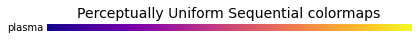

In [1]:
#@title #1. Library { display-mode: "form" }
# Instalar librerias 
!pip install colorspacious
!pip install squarify
!pip install plotly

# importar librerias
import os
import re
import gc
import math
import json
import warnings
import squarify 
import numpy as np
import pandas as pd
import gspread as gs
import seaborn as sns
from datetime import date
from datetime import datetime
from google.colab import files, drive, auth, data_table
from google.auth import default
from collections import Counter
from scipy.interpolate import make_interp_spline
from colorspacious import cspace_converter
from matplotlib import cm
import matplotlib as mpl # modificar parametros de graficos
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

cmaps = {}
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    return cmap_list

print('Impresión de colores Emergia')
plasm = plot_color_gradients('Perceptually Uniform Sequential',['plasma'])

In [2]:
#@title Autenticador en drive { display-mode: "form" }
#@markdown ---
# authorization in drive
drive.mount('/content/drive')
dir_path = '/content/drive/MyDrive/Amarilo/Data/Meses/'
path = os.chdir(dir_path)

Mounted at /content/drive


# Octubre 2022 a Enero 2023

In [14]:
#@title Selección del mes requerido 
import ipywidgets as widgets
fruit_list = os.listdir(path)
fruit_picker = widgets.Dropdown(options=fruit_list)
fruit_picker

Dropdown(options=('ejemplo.csv', 'ejemplo2.csv', 'Marzo2021-Noviembre2022', 'Noviembre2022-Enero2023_v2', 'Nov…

In [15]:
#@title ### Verificación de archivos disponibles. { vertical-output: true }
#@markdown Información del mes seleccionado
mes = fruit_picker.value
Nombre_archivo = os.listdir(mes)[0]
os.listdir(mes)[0]

'DESCARGA SHARPSPRING.xlsx'

In [16]:
#@title ###Carga del mes selecionado { run: "auto", vertical-output: true }
#@markdown nombre del archivo
# Nombre_archivo = 'Sabana 2' #@param {type:"string"}
# nombre_completo = [i for i in os.listdir(mes+'/') if 'DESCARGA SHARPSPRING' in i][0]
nombre_completo = 'DESCARGA SHARPSPRING_v2.xlsx'
df_m1 = pd.read_excel(mes+'/'+nombre_completo, sheet_name=0)
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117877 entries, 0 to 117876
Columns: 130 entries, Opportunity to Ciudad Interés Feria_op
dtypes: datetime64[ns](8), float64(2), object(120)
memory usage: 116.9+ MB


# Noviembre a Enero

In [3]:
#@title Selección del mes requerido 
import ipywidgets as widgets
fruit_list = os.listdir(path)
fruit_picker = widgets.Dropdown(options=fruit_list)
fruit_picker

Dropdown(options=('ejemplo.csv', 'ejemplo2.csv', 'Marzo2021-Noviembre2022', 'Noviembre2022-Enero2023_v2', 'Nov…

In [6]:
#@title ### Verificación de archivos disponibles. { vertical-output: true }
#@markdown Información del mes seleccionado
mes = fruit_picker.value
Nombre_archivo = os.listdir(mes)
os.listdir(mes)

['Sabana 2.xlsx',
 'INFORME SHARPSPRING (1).xlsx',
 'Carga_INFORME_SHARPSPRING.xlsx']

In [7]:
#@title ###Carga del mes selecionado { run: "auto", vertical-output: true }
#@markdown nombre del archivo
Nombre_archivo = 'Carga_INFORME_SHARPSPRING' #@param {type:"string"}
nombre_completo = [i for i in os.listdir(mes+'/') if Nombre_archivo in i][0]
df_m_2 = pd.read_excel(mes+'/'+nombre_completo, sheet_name=0)
df_m_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194325 entries, 0 to 194324
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Opportunity           194286 non-null  object        
 1   Created               194325 non-null  datetime64[ns]
 2   Last Updated Date     194325 non-null  datetime64[ns]
 3   Assigned to           193499 non-null  object        
 4   Sales Pipeline        194325 non-null  object        
 5   Stage                 194324 non-null  object        
 6   Status                194325 non-null  object        
 7   Active                194325 non-null  bool          
 8   ASESOR                67689 non-null   object        
 9   FECHA CITA            38432 non-null   object        
 10  CUARTA                15908 non-null   object        
 11  QUINTA                14305 non-null   datetime64[ns]
 12  PRIMERA               75548 non-null   object        
 13 

In [ ]:
df_m_2.columns

Index(['Opportunity', 'Created', 'Last Updated Date', 'Assigned to',
       'Sales Pipeline', 'Stage', 'Status', 'Active', 'Account',
       'Primary Campaign',
       ...
       '# de Documento', 'Ciudad Interés Feria_op', 'Unnamed: 130',
       'Unnamed: 131', 'Unnamed: 132', 'Unnamed: 133', 'Unnamed: 134',
       'Unnamed: 135', 'Unnamed: 136', 'Unnamed: 137'],
      dtype='object', length=138)

In [18]:
df_m_2['ASESOR'][df_m_2['MES AGENDAMIENTO']==10][df_m_2.AÑO==2022].value_counts().sum()

3763

# Febrero

In [ ]:
#@title Selección del mes requerido 
import ipywidgets as widgets
fruit_list = os.listdir(path)
fruit_picker = widgets.Dropdown(options=fruit_list)
fruit_picker

Dropdown(options=('ejemplo.csv', 'ejemplo2.csv', 'Marzo2021-Noviembre2022', 'Noviembre2022-Enero2023_v2', 'Nov…

In [ ]:
#@title ### Verificación de archivos disponibles. { vertical-output: true }
#@markdown Información del mes seleccionado
mes = fruit_picker.value
Nombre_archivo = os.listdir(mes)
os.listdir(mes)

['Opps2023_03_09.csv', 'Opps2023_03_09_.xlsx']

In [ ]:
#@title ###Carga del mes selecionado { run: "auto", vertical-output: true }
#@markdown nombre del archivo
Nombre_archivo = 'Opps2023_03_09_' #@param {type:"string"}
nombre_completo = [i for i in os.listdir(mes+'/') if Nombre_archivo in i][0]
df_m_3 = pd.read_excel(mes+'/'+nombre_completo)
df_m_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199869 entries, 0 to 199868
Columns: 138 entries, Opportunity to Proyecto Conversion
dtypes: bool(1), float64(3), int64(1), object(133)
memory usage: 209.1+ MB


# temporal

In [ ]:
df_m1.shape

(117877, 130)

In [ ]:
def formato_fecha(s_date):
  """
  Esta función es para realizar la organización de las fechas, sea de: 
  - Creación, gestión u otro.
  creación
  input:
    s_date: fecha de gestión de la base de datos 
  output:
    fecha_organizada: fecha de la gestión organizada
  """
  try:
    fecha_organizada = pd.to_datetime(s_date).strftime("%Y-%m-%d")
  except:
    fecha_organizada = s_date
  return fecha_organizada

df_m1['Fecha_creado'] = df_m1['Created'].apply(lambda x: formato_fecha(x))


In [ ]:
df_m1.Fecha_creado[0]

'2022-01-25'

In [ ]:
df_m1 = df_m1[(df_m1.Fecha_creado>='2022-10-01') & (df_m1.Fecha_creado<='2022-10-31')][df_m1['Nombre Asesor Contact'].notna()]

In [ ]:
df_m1.iloc[:,:100].info()

In [ ]:
df_m1.iloc[:,100:].info()

In [ ]:
df_m1.iloc[:,28].unique()

In [ ]:
#@title Cantidad de registros 
print(df_m1.shape) # 
print(df_m2.shape) # 

(117877, 131)
(53743, 138)


In [ ]:
#@title Cantidad de registros activos 
df_m1[df_m1.Status=='Open'].shape

(7257, 130)

In [ ]:
#@title Cantidad de salas activas con todos los registros
df_m1['Sales Pipeline'].unique().shape

(68,)

In [ ]:
#@title Cantidad de salas activas con los registros abiertos
df_m1['Sales Pipeline'][df_m1.Status=='Open'].unique().shape

(47,)

In [ ]:
df_m1[df_m1.Status=='Open'][df_m1['Primera gestión Contact Center'].notna()]

In [ ]:
df_m1.columns

Index(['Opportunity', 'Created', 'Last Updated Date', 'Assigned to',
       'Sales Pipeline', 'Stage', 'Status', 'Active', 'Account',
       'Primary Campaign',
       ...
       'Fecha tercera gestión Contact Center', 'Call ID',
       'Llamada 3er Seguimiento Opcionado',
       '2da Llamada Confirmación cita Agendada',
       'Fecha 2da llamada Confirmación cita Agendada',
       'Fecha 2do Seguimiento Opcionado', 'Tipo Contacto', 'No aplica',
       '# de Documento', 'Ciudad Interés Feria_op'],
      dtype='object', length=130)

# Datos organizados

In [8]:
# df_m2.drop(labels=['Unnamed: 130', 'Unnamed: 131', 'Unnamed: 132', 'Unnamed: 133', 
#                    'Unnamed: 134', 'Unnamed: 135', 'Unnamed: 136', 'Unnamed: 137'], 
#            axis=1, inplace=True)

# concatenar la información de las diferentes meses

In [9]:
df_m = df_m_2.copy() #pd.concat([df_m1, df_m2], axis=0)

In [10]:
df_m

Opportunity             Created  \
0                               CANTABRIA-YANNETH ALVAREZ 2023-02-27 08:22:17   
1                                   VENTUM///Leidy Torres 2023-02-27 08:19:16   
2                                           Andres Moreno 2023-02-27 07:57:00   
3                                          JuliÃ¡n Forero 2023-02-27 07:46:15   
4       Contact center:  OP Contact Center - Feb. 27- ... 2023-02-27 07:39:28   
...                                                   ...                 ...   
194320                 Manaca- Raul Jose Marrugo Martinez 2021-12-20 10:48:15   
194321  Ponte Verdi - LMGGCamilo Andres Espinosa Lanch... 2021-12-13 11:35:57   
194322          CC Parque Heredia -AMBR- Cristian Linares 2021-09-23 13:48:07   
194323                  Guayacan - SVOA Patricia Lizarazo 2021-09-18 13:43:38   
194324      Inlat - CC Parque Heredia -AMBR- Damaris Vega 2022-03-07 17:21:11   

         Last Updated Date                           Assigned to  \
0      2023-02-27 08:22:52                          SN Cantabria   
1      2023-02-27 08:20:29                SN Hacienda Santa Cruz   
2      2023-02-27 07:57:00         JOAN STIVEN HERNANDEZ RAMIREZ   
3      2023-02-27 07:46:15         EVELYN XIMENA AVENDAÃ‘O LOPEZ   
4      2023-02-27 07:39:28               LEANDRO MOLINA ROJAS EM   
...                    ...                                   ...   
194320 2021-12-27 17:42:28                         SN Las Palmas   
194321 2022-05-25 17:45:42                        SN Ponte Verdi   
194322 2022-05-27 15:54:22  ANA MILENA BAENA RUBIO #Desactivado#   
194323 2021-10-21 11:26:40                        SN LGDT Bosque   
194324 2022-06-03 12:53:11  ANA MILENA BAENA RUBIO #Desactivado#   

                       Sales Pipeline                                 Stage  \
0                        SN Cantabria            Cita Agendada SN Cantabria   
1              SN Hacienda Santa Cruz  Cita Agendada SN Hacienda Santa Cruz   
2              Conversion - OrquÃ­dea                  Interesado OrquÃ­dea   
3              Conversion - OrquÃ­dea                  Interesado OrquÃ­dea   
4       Proceso Ventas Contact Center                            Interesado   
...                               ...                                   ...   
194320                  SN Las Palmas             SeparaciÃ³n SN Las Palmas   
194321                 SN Ponte Verdi               SeparaciÃ³n Ponte Verdi   
194322                 SN Empresarial          SeparaciÃ³n SN Empresariales   
194323             SN Hacienda Bosque        SeparaciÃ³n SN Hacienda Bosque   
194324                 SN Empresarial          SeparaciÃ³n SN Empresariales   

             Status  Active                          ASESOR  \
0              Open    True      Ana Maria RincÃ³n Ortiz EM   
1              Open    True  Miguel Angel Cardona Rendon EM   
2              Open    True                             NaN   
3              Open    True                             NaN   
4              Open    True                             NaN   
...             ...     ...                             ...   
194320   Closed Won    True                              54   
194321   Closed Won    True                     CSA-CASA-51   
194322   Closed Won    True                      LOC-CI-219   
194323   Closed Won    True                       144062740   
194324  Closed Lost    True                             NaN   

                 FECHA CITA  ...         FECHA CIERRE TRAMO CIERRE  MES   AÑO  \
0       2023-03-01 10:00:00  ...                    -            -    2  2023   
1       2023-03-19 15:00:00  ...                    -            -    2  2023   
2                       NaN  ...  2023-02-27 00:00:00            7    2  2023   
3                       NaN  ...                    -            -    -     -   
4                       NaN  ...                    -            -    2  2023   
...                     ...  ...                  ...          .

# Patrón de comportamiento en el agendamiento

In [17]:
Columnas_= ['Created', 'Nombre Asesor Contact', '# de Documento', 'Status', 'Active', 
            'Causa de cierre', 'Sales Pipeline', 'Sala de ventas Oportunidad', 'Last Updated Date',
            'Primera gestión Contact Center', 'Fecha primera gestión Contact Center', 
            'Segunda gestión Contact Center', 'Fecha segunda gestión Contact Center', 
            'Tercera gestión Contact Center', 'Fecha tercera gestión Contact Center', 
            'Cuarta gestión Contact Center', 'Fecha cuarta gestión Contact Center', 
            'Quinta gestión Contact Center', 'Fecha quinta gestión Contact Center', 
            'Tipo Contacto', 'Tipo de visita']
df_ = df_m[Columnas_].fillna(0)
df_.reset_index(drop=True, inplace=True)

KeyError: ignored

In [ ]:
df_.columns

In [ ]:
df_.shape

In [ ]:
df_[df_['Nombre Asesor Contact']!=0].shape

In [ ]:
df_['Causa de cierre'][df_['Nombre Asesor Contact']!=0].unique().shape

In [ ]:
df_m[df_['Nombre Asesor Contact']!=0].iloc[:, :100].info()
df_m[df_['Nombre Asesor Contact']!=0].iloc[:, 100:].info()

In [ ]:
df_.shape

In [ ]:
df_['Nombre Asesor Contact'].unique()

In [ ]:
df_[df_['Nombre Asesor Contact']!=0].shape

In [ ]:
df_.shape

In [ ]:
df_['Nombre Asesor Contact'][df_['Nombre Asesor Contact']==0].unique()

In [ ]:
#@title Organizar la información solo con los agentes de Emergia
tiempo_Gestion_1 = df_[Columnas_][df_['Nombre Asesor Contact']!=0]
tiempo_Gestion_1.reset_index(drop=True, inplace=True)

In [ ]:
tiempo_Gestion_1.shape

In [ ]:
df_[(df_.Created>='2022-10-01') & (df_.Created<='2022-10-31')].shape

In [ ]:
df_['Nombre Asesor Contact'][df_['Nombre Asesor Contact']!=0][(df_.Created>='2022-10-01') & (df_.Created<='2022-10-31')].shape

In [ ]:
df_[df_['Nombre Asesor Contact']!=0][(df_.Created>='2022-10-01') & (df_.Created<='2022-10-31')].shape

In [ ]:
# Ejemplo de assign
#df2 = df.assign(D=lambda df: df.B/df.C)

In [ ]:
# tiempo_Gestion_1_ = tiempo_Gestion_1[tiempo_Gestion_1['Fecha primera gestión Contact Center']!=0]
# tiempo_Gestion_1_['Fecha primera gestión Contact Center'] = tiempo_Gestion_1_['Fecha primera gestión Contact Center'].astype(str)
# tiempo_Gestion_1_['Fecha segunda gestión Contact Center'] = tiempo_Gestion_1_['Fecha segunda gestión Contact Center'].astype(str)
# tiempo_Gestion_1_['Fecha tercera gestión Contact Center'] = tiempo_Gestion_1_['Fecha tercera gestión Contact Center'].astype(str)
# tiempo_Gestion_1_['Fecha cuarta gestión Contact Center']  = tiempo_Gestion_1_['Fecha cuarta gestión Contact Center'].astype(str)
# tiempo_Gestion_1_['Fecha quinta gestión Contact Center']  = tiempo_Gestion_1_['Fecha quinta gestión Contact Center'].astype(str)

In [ ]:
#@title verificación de formato de las fechas
gestion = ['Fecha primera gestión Contact Center', 'Fecha segunda gestión Contact Center',
           'Fecha tercera gestión Contact Center', 'Fecha cuarta gestión Contact Center',
           'Fecha quinta gestión Contact Center']

for gest in gestion: # recorrido de las gestiones
  for i in range(tiempo_Gestion_1.shape[0]): # Recorrido del dataframe
    try:
      pd.to_datetime(tiempo_Gestion_1[gest][i]).strftime("%x")
    except:
      print(gest+'_error en indice: '+str(i))
      print(tiempo_Gestion_1[gest][i])


In [ ]:
# #@title Error identificados de las diferentes fechas de gestión
# # Primera gestión
# tiempo_Gestion_1[gestion[0]][22973] = '2022-08-27 17:30:00'

# # Tercera gestión
# tiempo_Gestion_1[gestion[2]][11442] = '2022-10-05 15:45:00'
# tiempo_Gestion_1[gestion[2]][279] = 0
# tiempo_Gestion_1[gestion[2]][11694] = 0
# tiempo_Gestion_1[gestion[2]][11703] = 0
# tiempo_Gestion_1[gestion[2]][11740] = 0
# tiempo_Gestion_1[gestion[2]][15391] = 0
# tiempo_Gestion_1[gestion[2]][21717] = 0
# tiempo_Gestion_1[gestion[2]][22008] = 0
# tiempo_Gestion_1[gestion[2]][22165] = '2022-09-08 12:00:00'
# tiempo_Gestion_1[gestion[2]][22260] = '2022-09-05 15:21:00'
# tiempo_Gestion_1[gestion[2]][23635] = '2022-09-20 11:46:00'
# tiempo_Gestion_1[gestion[2]][27501] = '2022-10-03 10:00:00'
# tiempo_Gestion_1[gestion[2]][28648] = '2022-09-07 10:03:00'
# tiempo_Gestion_1[gestion[2]][29039] = '2022-09-27 16:49:00'
# tiempo_Gestion_1[gestion[2]][30670] = 0

In [ ]:
#@title Organizar las fechas para los meses de Octubre 2022 a Enero 2023
def formato_fecha(s_date):
  """
  Esta función es para realizar la organización de las fechas, sea de: 
  - Creación, gestión u otro.
  creación
  input:
    s_date: fecha de gestión de la base de datos 
  output:
    fecha_organizada: fecha de la gestión organizada
  """
  try:
    fecha_organizada = pd.to_datetime(s_date).strftime("%Y-%m-%d")
  except:
    fecha_organizada = s_date
  return fecha_organizada

tiempo_Gestion_1.Created = tiempo_Gestion_1.Created.astype(str)
tiempo_Gestion_1['Fecha_creado'] = tiempo_Gestion_1['Created'].apply(lambda x: formato_fecha(x))

#@markdown Gestión diferencia de fecha 
for i in range(1,6):
  tiempo_Gestion_1['Fecha_'+str(i)] = tiempo_Gestion_1[gestion[i-1]].apply(lambda x:0 if x==0 else formato_fecha(x))
  tiempo_Gestion_1['Diff_Gest_'+str(i)+'_dias']= (pd.to_datetime(tiempo_Gestion_1['Fecha_'+str(i)][tiempo_Gestion_1['Fecha_'+str(i)]!=0])-pd.to_datetime(tiempo_Gestion_1['Fecha_creado'][tiempo_Gestion_1['Fecha_'+str(i)]!=0])).apply(lambda x:x.days)
  tiempo_Gestion_1['Diff_Gest_'+str(i)+'_mes'] = (pd.to_datetime(tiempo_Gestion_1['Fecha_'+str(i)][tiempo_Gestion_1['Fecha_'+str(i)]!=0])-pd.to_datetime(tiempo_Gestion_1['Fecha_creado'][tiempo_Gestion_1['Fecha_'+str(i)]!=0])).apply(lambda x:x.days/30)

#@markdown Mes de gestión 

tiempo_Gestion_1['Fecha_creado'] = tiempo_Gestion_1['Fecha_creado'].apply(lambda x:pd.to_datetime(x))
fechas = [['2022-10-01', '2022-10-31'], ['2022-11-01', '2022-11-30'], 
          ['2022-12-01', '2022-12-31'], ['2023-01-01', '2023-01-31']]
meses  = ['Octubre', 'Noviembre', 'Diciembre', 'Enero']
tiempo_Gestion_1_ = pd.DataFrame()
#@markdown Organizar la información en las fechas según el mes
for f in range(len(fechas)):
  tiempo_Gestion_1_f = pd.DataFrame()
  # tiempo_Gestion_1_f = tiempo_Gestion_1[tiempo_Gestion_1['Fecha_creado']>=fechas[f][0]][tiempo_Gestion_1['Fecha_creado']<=fechas[f][1]]
  # tiempo_Gestion_1_f = tiempo_Gestion_1[(tiempo_Gestion_1.Created>=fechas[f][0]) & (tiempo_Gestion_1.Created<=fechas[f][0])]
  if f == 0:
    tiempo_Gestion_1_f = tiempo_Gestion_1[(tiempo_Gestion_1.Created>='2022-10-01') & (tiempo_Gestion_1.Created<='2022-10-31')]
  elif f == 1:
    tiempo_Gestion_1_f = tiempo_Gestion_1[(tiempo_Gestion_1.Created>='2022-11-01') & (tiempo_Gestion_1.Created<='2022-11-31')]
  elif f == 2:
    tiempo_Gestion_1_f = tiempo_Gestion_1[(tiempo_Gestion_1.Created>='2022-12-01') & (tiempo_Gestion_1.Created<='2022-12-31')]
  elif f == 3:
    tiempo_Gestion_1_f = tiempo_Gestion_1[(tiempo_Gestion_1.Created>='2023-01-01') & (tiempo_Gestion_1.Created<='2023-01-31')]

  # df_m1['Assigned to'][(df_m1.Fecha_creado>='2022-10-01') & (df_m1.Fecha_creado<='2022-10-31')] #.shape Nombre Asesor Contact
  print('Mes {} Cantidad de registros {}'.format(meses[f], tiempo_Gestion_1_f.shape[0]))
  tiempo_Gestion_1_f['mes'] = meses[f]
  tiempo_Gestion_1_= pd.concat([tiempo_Gestion_1_, tiempo_Gestion_1_f])
tiempo_Gestion_1_.reset_index(drop=True, inplace=True)

lista_fecha = list()
for i in range(1,6):
  lista_fecha.append('Diff_Gest_'+str(i)+'_dias')
print('Tamaño de la base de datos para los meses entre octubre-Enero: {}, en promedio {} registros:'.format(str(tiempo_Gestion_1_.shape[0]), str(int(tiempo_Gestion_1_.shape[0]/len(fechas)))))

lista_diff = list()
lista_gest = list()
# lista de las gestiones
gest = ['Primera' , 'Segunda', 'Tercera', 'Cuarta', 'Quinta']

# organizar columnas
for i in range(1,6):
  lista_diff.append('Diff_Gest_'+str(i)+'_mes')
  lista_gest.append(gest[i-1]+' gestión Contact Center')

In [ ]:
#@title Organizar la información de los tipo de contacto y no contacto 
lista_no_contacto = ['No se logra contacto - Marcación automática', 'Teléfono errado', 
                     'No se logra contacto', 0, 'No se logra contacto - MarcaciÃ³n automÃ¡tica',
                     'TelÃ©fono errado', 'No se registrÃ³ para recibir informaciÃ³n']
lista_si_contacto = ['Prospecto duplicado', 'Solo información', 'Fuera del presupuesto', 
                     'Ubicación del proyecto', 'Comprará en otro momento', 'Ya compró en otro proyecto', 
                     'Razones Personales', 'Se acercará sin cita', 'Ya fue contactado por la sala', 
                     'No se registró para recibir información', 'Busca Vis', 'Disponibilidad de Proyecto', 
                     'Plazo de entrega lejano', 'Plazo de entrega cercano', 'Reportado', 
                     'Diseño - áreas más grandes', 'Busca desistidos', 'Diseño de los inmuebles',
                     'Estrato del Proyecto', 'Pérdida de empleo', 'Poco plazo para la cuota inicial',
                     'No le aprobaron crédito', 'Cantidad de parqueaderos', 'Busca VIP',
                     'Diseño - áreas más pequeñas', 'Caso de prueba', 'Diseño - otro tipo de acabados',
                     'Diseño de parqueaderos', 'UbicaciÃ³n del proyecto', 'Ya comprÃ³ en otro proyecto',
                     'Solo informaciÃ³n', 'Se acercarÃ¡ sin cita', 'ComprarÃ¡ en otro momento',
                     'No hay producto', 'PÃ©rdida de empleo', 'DiseÃ±o - Ã¡reas mÃ¡s grandes',
                     'No le aprobaron crÃ©dito', 'DiseÃ±o de los inmuebles', 'DiseÃ±o - Ã¡reas mÃ¡s pequeÃ±as',
                     'DiseÃ±o de parqueaderos', 'DiseÃ±o - otro tipo de acabados']

In [ ]:
tiempo_Gestion_1_.rename({'Causa de cierre':'Causa_de_cierre'}, axis=1, inplace=True)
tiempo_Gestion_1_.reset_index(drop=True, inplace=True)

In [ ]:
tiempo_Gestion_1_['Primera gestión Contact Center'].value_counts().index # tipo de gestiones (0 por organizar según tipo de cierre)

In [ ]:
#@title organizar la información de Contactado y no contactado
for i in range(len(lista_gest)):
  tiempo_Gestion_1_[lista_gest[i]][tiempo_Gestion_1_[lista_gest[i]].iloc[tiempo_Gestion_1_.query("Causa_de_cierre==@lista_no_contacto").index][tiempo_Gestion_1_[lista_gest[i]]==0].index]  = 'No Contactado'
  tiempo_Gestion_1_[lista_gest[i]][tiempo_Gestion_1_[lista_gest[i]].iloc[tiempo_Gestion_1_.query("Causa_de_cierre==@lista_si_contacto").index][tiempo_Gestion_1_[lista_gest[i]]==0].index]  = 'Contactado'

# Información de Agendamiento y Contactos

In [ ]:
# Octubre
((3763-901)/3763)*100

76.05633802816901

In [ ]:
#@title tabla Octubre
tiempo_Gestion_1_[lista_gest][tiempo_Gestion_1_.mes=='Octubre'].value_counts()

In [ ]:
# noviembre
((5284-2372)/5284)*100

55.10976532929599

In [ ]:
#@title tabla Noviembre
tiempo_Gestion_1_[lista_gest][tiempo_Gestion_1_.mes=='Noviembre'].value_counts()

In [ ]:
# Diciembre
((3413-1274)/3413)*100

62.67213595077644

In [ ]:
#@title tabla Diciembre
tiempo_Gestion_1_[lista_gest][tiempo_Gestion_1_.mes=='Diciembre'].value_counts()

In [ ]:
# Enero
((1514-140)/1514)*100

90.75297225891677

In [ ]:
#@title tabla Enero
tiempo_Gestion_1_[lista_gest][tiempo_Gestion_1_.mes=='Enero'].value_counts()

In [ ]:
# tiempo_Gestion_1 = df.assign(Diff_Fecha1=lambda df: df['Fecha_1']-df['Fecha_creado'])
# pd.to_datetime(tiempo_Gestion_1_['Created'][0].strftime("%x"))
# [int(i.days) for i in (pd.to_datetime(tiempo_Gestion_1['Fecha_1']-tiempo_Gestion_1['Fecha_creado'].strftime("%x"))))]
# date.strftime(tiempo_Gestion_1['Fecha primera gestión Contact Center'][tiempo_Gestion_1['Fecha primera gestión Contact Center']!=0][0], "%d") #.apply(lambda x : x.day)
# pd.to_datetime(tiempo_Gestion_1['Fecha primera gestión Contact Center'][tiempo_Gestion_1['Fecha primera gestión Contact Center']!=0]).day
# tiempo_Gestion_1['Fecha primera gestión Contact Center'][tiempo_Gestion_1['Fecha primera gestión Contact Center']!=0].apply(lambda x : pd.to_datetime(x).day)

## Conteo de gestiones

In [ ]:
#@title tabla organizada sin estrutura de filtro 
data_table.disable_dataframe_formatter() 

In [ ]:
tiempo_Gestion_1_.shape

(13974, 38)

In [ ]:
tiempo_Gestion_1_[lista_gest].groupby(by=lista_gest)['Primera gestión Contact Center'].count().unstack().fillna(0).astype(int)

Quinta gestión Contact Center                                                                                               Agendado  \
Primera gestión Contact Center Segunda gestión Contact Center Tercera gestión Contact Center Cuarta gestión Contact Center             
Agendado                       Agendado                       Contactado                     Contactado                            0   
                               Contactado                     Contactado                     Contactado                            0   
                               No Contactado                  No Contactado                  No Contactado                         0   
Contactado                     Agendado                       No Contactado                  No Contactado                         0   
                               Contactado                     Contactado                     Agendado                              0   
                                                                                             Contactado                            0   
                                                                                             No Contactado                         0   
                                                                                             Volver a llamar                       0   
                                                              No Contactado                  No Contactado                         0   
                                                              Volver a llamar                No Contactado                         0   
                               No Contactado                  Contactado                     Contactado                            0   
                                                                                             No Contactado                         0   
                                                              No Contactado                  Contactado                            0   
                                                                                             No Contactado                         0   
                                                              Volver a llamar                No Contactado                         0   
                               Volver a llamar                Contactado                     Contactado                            0   
                                                                                             No Contactado                         0   
                                                              No Contactado                  Contactado                            0   
                                                                                             No Contactado                         0   
                                                              Volver a llamar                No Contactado                         0   
No Contactado                  Agendado                       No Contactado                  No Contactado                         0   
                               Contactado                     Contactado                     Contactado                            0   
                                                                                             No Contactado                         0   
                                                              No Contactado                  Contactado                            0   
                                                                                             No Contactado                         0   
                                                                                             Volver a llamar                       0   
                                                              Volver a llamar                Contactado                            0   
                                                        

In [ ]:
tiempo_Gestion_1_.mes.unique()

array(['Octubre', 'Noviembre', 'Diciembre', 'Enero'], dtype=object)

In [ ]:
# from pandas._libs.hashtable import value_count
tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Octubre']['Primera gestión Contact Center'].value_counts().sum()

3763

In [ ]:
datos_ges = pd.DataFrame()
for i in range(len(lista_gest)):
  datos_ges. pd.DataFrame(tiempo_Gestion_1_.groupby(by=['Primera gestión Contact Center'])['Primera gestión Contact Center'].count()) #.unstack().fillna(0).astype(int)

In [ ]:
pd.DataFrame(tiempo_Gestion_1_.groupby(by=['Primera gestión Contact Center'])['Primera gestión Contact Center'].count()) #.unstack().fillna(0).astype(int)

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/google/colab/data_table.py", line 182, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  File "/usr/local/lib/python3.8/dist-packages/google/colab/data_table.py", line 158, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py", line 5799, in reset_index
    new_obj.insert(0, name, level_values)
  File "/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py", line 4414, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert Primera gestión Contact Center, already exists


Primera gestión Contact Center
Primera gestión Contact Center                                
Agendado                                                   153
Contactado                                                7296
No Contactado                                             5138
Volver a llamar                                           1387

In [ ]:
tiempo_Gestion_1_[['Segunda gestión Contact Center', 'mes']].value_counts().unstack().fillna(0).astype(int).sum(axis=1)

Segunda gestión Contact Center
Agendado              8
Contactado         6419
No Contactado      7385
Volver a llamar     162
dtype: int64

In [ ]:
tiempo_Gestion_1_[['Tercera gestión Contact Center', 'mes']].value_counts().unstack().fillna(0).astype(int)

mes                             Diciembre  Enero  Noviembre  Octubre
Tercera gestión Contact Center                                      
Contactado                           1691    999       2037     1511
No Contactado                        1721    511       3244     2095
Volver a llamar                         1      4          3      157

In [ ]:
tiempo_Gestion_1_[['Cuarta gestión Contact Center', 'mes']].value_counts().unstack().fillna(0).astype(int).sum(axis=1)

Cuarta gestión Contact Center
Agendado              2
Contactado         6219
No Contactado      7732
Volver a llamar      21
dtype: int64

In [ ]:
tiempo_Gestion_1_[['Quinta gestión Contact Center', 'mes']].value_counts().unstack().fillna(0).astype(int).sum(axis=1)

Quinta gestión Contact Center
Agendado              1
Contactado         6221
No Contactado      7750
Volver a llamar       2
dtype: int64

In [ ]:
tiempo_Gestion_1_['Registro'] = 0
tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_[lista_gest[0]]=='Contactado'] = 1
tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_[lista_gest[1]]=='Contactado'] = 1
tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_[lista_gest[2]]=='Contactado'] = 1
tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_[lista_gest[3]]=='Contactado'] = 1
tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_[lista_gest[4]]=='Contactado'] = 1
tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_[lista_gest[0]]=='Agendado'] = 2
tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_[lista_gest[1]]=='Agendado'] = 2
tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_[lista_gest[2]]=='Agendado'] = 2
tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_[lista_gest[3]]=='Agendado'] = 2
tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_[lista_gest[4]]=='Agendado'] = 2

NameError: ignored

In [ ]:
#@title Valor de contactabilidad { run: "auto", vertical-output: true }
Val = 'Enero' #@param ['Octubre', 'Noviembre', 'Diciembre', 'Enero']
(tiempo_Gestion_1_['Registro'][tiempo_Gestion_1_['Registro']>0][tiempo_Gestion_1_.mes==Val].value_counts().sum()/tiempo_Gestion_1_[tiempo_Gestion_1_.mes==Val].shape[0])*100

80.51519154557464

In [ ]:
tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Octubre'].shape

(3763, 39)

In [ ]:
19+22+69+351+3578

4039

In [ ]:
(4039/23822)*100

16.954915624212912

In [ ]:
#@title Organizar la información 
gest = ['Primera' , 'Segunda', 'Tercera', 'Cuarta', 'Quinta']
lista_gest = list()
# organizar columnas
for i in range(1,6):
  lista_gest.append(gest[i-1]+' gestión Contact Center')

lista_gest.append('mes')

datos_ = pd.DataFrame()
datos_['Tipification'] = pd.concat([tiempo_Gestion_1_[lista_gest[0]], tiempo_Gestion_1_[lista_gest[1]], 
                        tiempo_Gestion_1_[lista_gest[2]], tiempo_Gestion_1_[lista_gest[3]],
                        tiempo_Gestion_1_[lista_gest[4]]])

datos_['mes'] = pd.concat([tiempo_Gestion_1_[lista_gest[5]], tiempo_Gestion_1_[lista_gest[5]], 
                        tiempo_Gestion_1_[lista_gest[5]], tiempo_Gestion_1_[lista_gest[5]],
                        tiempo_Gestion_1_[lista_gest[5]]])

In [ ]:
tiempo_Gestion_1__.mes.value_counts()

<ipython-input-44-8ba0d1eff85c>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-8ba0d1eff85c>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



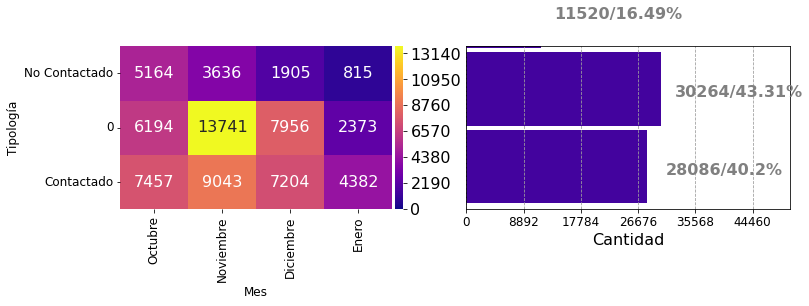

In [ ]:
#@title Figura con la cantidad de solicitudes según las salas de ventas { run: "auto", vertical-output: true }
# Tamaño de la letra
plt.rc_context({'axes.edgecolor':'black'})
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'sans-serif'
plt.rc_context({'axes.edgecolor':'white'}) # quitar bordes a la figura
plasm = cm.get_cmap('plasma', 20) # visualize with the new_inferno colormaps

Dim_x = 12 #@param {type:"number"}
Dim_y = 3 #@param {type:"number"}
# Tamaño de las barras
W_barras = 0.95 #@param {type:"number"}
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(Dim_x, Dim_y))

fig = plt.figure(figsize=(Dim_x, Dim_y))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.07)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[0, 1])

#markdown Figura para ver las tipificaciones por los diferentes meses
# temporal = pd.DataFrame(json.loads(datos_.groupby(by=['Tipification', 'mes'])['Tipification'].count().unstack().fillna(0).to_json(orient = 'columns')))
datos_1 = datos_.copy()
datos_1['Tipification'][datos_1['Tipification'] == 'Agendado'] = 'Contactado'
datos_1['Tipification'][datos_1['Tipification'] == 'Volver a llamar'] = 'Contactado'
temporal = pd.DataFrame(json.loads(datos_1.groupby(by=['Tipification', 'mes'])['Tipification'].count().unstack().fillna(0).astype(int).to_json(orient = 'columns')))
tiempo_Gestion_1__ = tiempo_Gestion_1_.copy()
tiempo_Gestion_1__['Primera gestión Contact Center'][tiempo_Gestion_1__['Primera gestión Contact Center'] == 'Agendado'] = 'Contactado'
tiempo_Gestion_1__['Primera gestión Contact Center'][tiempo_Gestion_1__['Primera gestión Contact Center'] == 'Volver a llamar'] = 'Contactado'
temporal = temporal.T[np.flip(tiempo_Gestion_1__.groupby(by=['Primera gestión Contact Center'])['Primera gestión Contact Center'].count().sort_values(ascending=False).index.values.tolist())].T
temporal = temporal[['Octubre', 'Noviembre', 'Diciembre', 'Enero']]
ax = sns.heatmap(temporal, 
                 ax=ax1, annot=True, annot_kws={"size": 16}, cbar=True, 
                 cbar_kws=dict(use_gridspec=False, location="right", pad=0.01, shrink=1, 
                               ticks=list(np.arange(0, temporal.max().max(), 2190))),
                 cmap='plasma', vmin=0, vmax=temporal.max().max(),
                 fmt="") # center=0 para centralizar los colores de la figura
for tick in ax.xaxis.get_major_ticks():
  tick.label.set_fontsize(12) 

for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(12) 
  tick.label.set_rotation('horizontal')
ax.set_xlabel('Mes', fontdict={'size':12})
ax.set_ylabel('Tipología', fontdict={'size':12})
# # cantidad de los registros utilizados
# # Tamaño de la figura

# tiempo_Gestion_1__.groupby(by=['Primera gestión Contact Center'])['Primera gestión Contact Center'].count().sort_values(ascending=False).plot(kind='barh', ax=ax2, color=plasm.colors[2], width=W_barras)
np.flip(temporal.sum(axis=1)).plot(kind='barh', ax=ax2, color=plasm.colors[2], width=W_barras)
#####@markdown Pareto ######@param {type:"integer"}
# cantidad = 13 
# valor_pareto = ((df_m[df_m.Status=='Open'].groupby(by=['Sales Pipeline'])['Sales Pipeline'].count().sort_values(ascending=False)/df_m[df_m.Status=='Open'].groupby(by=['Sales Pipeline'])['Sales Pipeline'].count().sort_values(ascending=False).sum())*100)[:cantidad].sum()
# print('Valor pareto: '+str(valor_pareto)+' Con primeras '+str(cantidad)+' Salas de ventas')
# ####@markdown ---
def add_value_label(x_list, y_list, y_list2):
    for i in range(1, len(x_list)+1):
        num = str(y_list[i-1])+'/'+str(round((y_list[i-1]/y_list2)*100,2))
        plt.text(y_list[i-1]+12000, i-1.1, num+'%',ha='center', color = 'gray', 
                 weight='bold', rotation=0, fontsize = 16)
add_value_label(np.arange(0,len(np.flip(temporal.sum(axis=1)).tolist()),1), 
                np.flip(temporal.sum(axis=1)).tolist(),
                np.flip(temporal.sum(axis=1)).sum())
# plt.plot([cantidad-0.5, cantidad-0.5], [0, 15000], '--', label='line 1', linewidth=2, color=plasm.colors[-5,:])
# plt.ylim([0, 3000])
T_y = np.flip(temporal.sum(axis=1)).max()+20000 
plt.xticks(ticks=np.arange(0, T_y, 8892), rotation=0, fontsize=12)
# plt.xticks(ticks=np.arange(0.5, 4, 1))
# does not show any effect
plt.ylim([-0.55, 1.55])
plt.xlim([0, T_y])
plt.grid(True, zorder=0,  axis='x', color='#9E9E9E', linestyle='--', linewidth=0.8)

# does not show any effect
# plt.set_axisbelow(True)
# works

# ax.yaxis.label.set_color('red')
# ax.xaxis.label.set_color('red')
plt.xlabel('Cantidad')
plt.yticks([])
plt.ylabel('')
#@markdown ---
plt.show()

In [ ]:
5381/4032

1.3345734126984128

In [ ]:
df_m_['MES AGENDAMIENTO']

0         2
1         2
2         -
3         -
4         -
         ..
194320    -
194321    -
194322    -
194323    -
194324    -
Name: MES AGENDAMIENTO, Length: 194325, dtype: object

In [ ]:
df_m_.columns

Index(['Opportunity', 'Created', 'Last Updated Date', 'Assigned to',
       'Sales Pipeline', 'Stage', 'Status', 'Active', 'ASESOR', 'FECHA CITA',
       'CUARTA', 'QUINTA', 'PRIMERA', 'SEGUNDA', 'TERCERA', 'PERTENECE A',
       'ESTADO REAL', 'FECHA CREACION', 'TRAMO CREACION', 'FECHA CIERRE',
       'TRAMO CIERRE', 'MES', 'AÑO', 'CERRADO', 'ESTADO AGENDADOS',
       'FECHA AGENDAMIENTO', 'TRAMO AGENDAMIENTO', 'MES AGENDAMIENTO',
       'CANTIDAD DE LLAMADAS'],
      dtype='object')

In [ ]:
df_m_[df_m_['MES AGENDAMIENTO']==10][df_m_.AÑO==2022]

In [ ]:
df_m_.columns[:50]

Index(['Opportunity', 'Created', 'Last Updated Date', 'Assigned to',
       'Sales Pipeline', 'Stage', 'Status', 'Active', 'ASESOR', 'FECHA CITA',
       'CUARTA', 'QUINTA', 'PRIMERA', 'SEGUNDA', 'TERCERA', 'PERTENECE A',
       'ESTADO REAL', 'FECHA CREACION', 'TRAMO CREACION', 'FECHA CIERRE',
       'TRAMO CIERRE', 'MES', 'AÑO', 'CERRADO', 'ESTADO AGENDADOS',
       'FECHA AGENDAMIENTO', 'TRAMO AGENDAMIENTO', 'MES AGENDAMIENTO',
       'CANTIDAD DE LLAMADAS'],
      dtype='object')

In [ ]:
(temporal.max().max()/14)

1095.5

In [ ]:
tiempo_Gestion_1_.shape

(13974, 38)

In [ ]:
tiempo_Gestion_1_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Created                               13974 non-null  object        
 1   Nombre Asesor Contact                 13974 non-null  object        
 2   # de Documento                        13974 non-null  object        
 3   Status                                13974 non-null  object        
 4   Active                                13974 non-null  bool          
 5   Causa_de_cierre                       13974 non-null  object        
 6   Sales Pipeline                        13974 non-null  object        
 7   Sala de ventas Oportunidad            13974 non-null  object        
 8   Last Updated Date                     13974 non-null  datetime64[ns]
 9   Primera gestión Contact Center        13974 non-null  object        
 10

In [ ]:
tiempo_Gestion_1_[tiempo_Gestion_1_['Tipo Contacto']!=0].groupby(by=['Tipo Contacto'])['Tipo Contacto'].count()

Tipo Contacto
Llamada Inbound        28
Llamada Outbound    13364
Whatsapp               53
Name: Tipo Contacto, dtype: int64

# Fechas organizadas por registro del Lead

In [ ]:
tiempo_Gestion_1_.columns

Index(['Created', 'Nombre Asesor Contact', '# de Documento', 'Status',
       'Active', 'Causa_de_cierre', 'Sales Pipeline',
       'Sala de ventas Oportunidad', 'Last Updated Date',
       'Primera gestión Contact Center',
       'Fecha primera gestión Contact Center',
       'Segunda gestión Contact Center',
       'Fecha segunda gestión Contact Center',
       'Tercera gestión Contact Center',
       'Fecha tercera gestión Contact Center', 'Cuarta gestión Contact Center',
       'Fecha cuarta gestión Contact Center', 'Quinta gestión Contact Center',
       'Fecha quinta gestión Contact Center', 'Tipo Contacto',
       'Tipo de visita', 'Fecha_creado', 'Fecha_1', 'Diff_Gest_1_dias',
       'Diff_Gest_1_mes', 'Fecha_2', 'Diff_Gest_2_dias', 'Diff_Gest_2_mes',
       'Fecha_3', 'Diff_Gest_3_dias', 'Diff_Gest_3_mes', 'Fecha_4',
       'Diff_Gest_4_dias', 'Diff_Gest_4_mes', 'Fecha_5', 'Diff_Gest_5_dias',
       'Diff_Gest_5_mes', 'mes'],
      dtype='object')

In [ ]:
tiempo_Gestion_1_['Hora'] = 0
tiempo_Gestion_1_['Hora_'] = 0
tiempo_Gestion_1_['dia'] = 0
tiempo_Gestion_1_['Hora'] = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
tiempo_Gestion_1_['Hora_'] = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%X'))
tiempo_Gestion_1_['dia'] = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
tiempo_Gestion_1_.Hora = tiempo_Gestion_1_.Hora.astype(int)

In [ ]:
df_m_ = df_m_2.copy()
df_m_.Created = df_m_.Created.astype('object')
df_m_['Hora'] = 0
df_m_['dia']  = 0
df_m_['Hora'] = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
# df_m_['Hora_'] = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%X'))
df_m_['dia']  = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
df_m_.Hora    = df_m_.Hora.astype(int)
# cargar sabana de los meses analizados
df_m_ = pd.concat([df_m_[df_m_['MES AGENDAMIENTO']==10][df_m_.AÑO==2022], df_m_[df_m_['MES AGENDAMIENTO']==11][df_m_.AÑO==2022],
          df_m_[df_m_['MES AGENDAMIENTO']==12][df_m_.AÑO==2022], df_m_[df_m_['MES AGENDAMIENTO']==1][df_m_.AÑO==2023]], axis=0)
df_m_.reset_index(drop=True, inplace=True)

df_m_['mes'] = 0
df_m_['mes'][df_m_['MES AGENDAMIENTO']==10] = 'OCTUBRE'
df_m_['mes'][df_m_['MES AGENDAMIENTO']==11] = 'NOVIEMBRE'
df_m_['mes'][df_m_['MES AGENDAMIENTO']==12] = 'DICIEMBRE'
df_m_['mes'][df_m_['MES AGENDAMIENTO']==1] = 'ENERO'

In [ ]:
tiempo_Gestion_1_['Hora'] = 0
tiempo_Gestion_1_['dia']  = 0
tiempo_Gestion_1_['Hora'] = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
tiempo_Gestion_1_['dia']  = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
tiempo_Gestion_1_.Hora = tiempo_Gestion_1_.Hora.astype(int)
temporal = tiempo_Gestion_1_.groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha primer conotacto
temporal_1 = df_m_[df_m_['PRIMERA'].notna()].groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_1.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha segundo conotacto
temporal_2 = df_m_[df_m_['SEGUNDA'].notna()].groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_2.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha tercera conotacto
temporal_3 = df_m_[df_m_['TERCERA'].notna()].groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_3.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha cuarta conotacto
temporal_4 = df_m_[df_m_['CUARTA'].notna()].groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_4.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha quinta conotacto
temporal_5 = df_m_[df_m_['QUINTA'].notna()].groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_5.rename(columns={'size':'Cantidad'}, inplace=True)

In [ ]:
# tiempo_Gestion_1_['Hora'] = 0
# tiempo_Gestion_1_['dia']  = 0
# tiempo_Gestion_1_['Hora'] = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
# tiempo_Gestion_1_['dia']  = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
# tiempo_Gestion_1_.Hora = tiempo_Gestion_1_.Hora.astype(int)
# temporal = tiempo_Gestion_1_.groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
# temporal.rename(columns={'size':'Cantidad'}, inplace=True)

# # Fecha primer conotacto
# temporal_1 = tiempo_Gestion_1_[tiempo_Gestion_1_['Primera gestión Contact Center']=='Agendado'].groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
# temporal_1.rename(columns={'size':'Cantidad'}, inplace=True)

# # Fecha segundo conotacto
# temporal_2 = tiempo_Gestion_1_[tiempo_Gestion_1_['Segunda gestión Contact Center']=='Agendado'].groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
# temporal_2.rename(columns={'size':'Cantidad'}, inplace=True)

# # Fecha tercera conotacto
# temporal_3 = tiempo_Gestion_1_[tiempo_Gestion_1_['Tercera gestión Contact Center']=='Agendado'].groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
# temporal_3.rename(columns={'size':'Cantidad'}, inplace=True)

# # Fecha cuarta conotacto
# temporal_4 = tiempo_Gestion_1_[tiempo_Gestion_1_['Cuarta gestión Contact Center']=='Agendado'].groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
# temporal_4.rename(columns={'size':'Cantidad'}, inplace=True)

# # Fecha quinta conotacto
# temporal_5 = tiempo_Gestion_1_[tiempo_Gestion_1_['Quinta gestión Contact Center']=='Agendado'].groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
# temporal_5.rename(columns={'size':'Cantidad'}, inplace=True)

In [ ]:
# temporal = tiempo_Gestion_1_.groupby(by=['dia', 'Hora', 'mes'], as_index=False).size()
# temporal.rename(columns={'size':'Cantidad'}, inplace=True)
# temporal.sort_values(by=['Hora'], ascending=[False], inplace=True, 
#                      na_position='first', ignore_index=True, axis=0, 
#                      kind='quicksort')
# tiempo_Gestion_2_ = pd.DataFrame()
# for i in tiempo_Gestion_1_.mes.unique().tolist():
#   tiempo_Gestion_2 = pd.DataFrame()
#   tiempo_Gestion_2 = temporal[temporal.mes==i]
#   tiempo_Gestion_2_= pd.concat([tiempo_Gestion_2_, tiempo_Gestion_2], axis=0)
# temporal = tiempo_Gestion_2_.copy()
# del tiempo_Gestion_2_
# temporal

# figura de gestión y contactabilidad

In [ ]:
temporala[temporala.dia=='10-01'].Cantidad.mean()

15.15

In [ ]:
#Reading the dataset
# bill_dataframe = sns.load_dataset("tips")
# Tamaño de la letra
# plt.rc_context({'axes.edgecolor':'black'})
mpl.rcParams['font.size'] = 58
mpl.rcParams['font.family'] = 'sans-serif'
plt.rc_context({'axes.edgecolor':'white'}) # quitar bordes a la figura
plasm = cm.get_cmap('plasma',20) # visualize with the new_inferno colormaps
#Creating bubble plot
Dim_x = 80 #@param {type:"number"}
Dim_y = 20  #@param {type:"number"}
# # Tamaño de las barras
W_barras = 0.95 #@param {type:"number"}
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(Dim_x, Dim_y))
fig = plt.figure(figsize=(Dim_x, Dim_y),  dpi=300)
gs1 = gridspec.GridSpec(2, 2, width_ratios=[3, 0.2], height_ratios=[6, 1])
gs1.update(wspace=0.03, hspace=0.25)
ax1_ = fig.add_subplot(gs1[0, 0])
ax2_ = fig.add_subplot(gs1[0, 1])
# ax3_ = plt.subplot(gs1[1, 0])
mes_ = 'Octubre'
temporal_ = pd.DataFrame()
for i in meses:
  temporal_ = pd.concat([temporal_, temporal[temporal.mes==i]], axis=0)
temporala = temporal_.copy()
temporala = temporala
# temporal = tiempo_Gestion_1_.groupby(by=['dia', 'Hora'], as_index=False).size()
# temporal.rename(columns={'size':'Cantidad'}, inplace=True)
axx = sns.scatterplot(data=temporala, x="dia", y="Hora", size="Cantidad", 
                hue="Cantidad", palette='plasma', sizes = (300, 800), 
                linewidth=2.7, marker="o", alpha = 0.9, ax=ax1_, 
                )
# plt.colorbar(ax1_)
# sns.scatterplot(data=temporal_1, x="dia", y="Hora", 
#                 palette='orange', sizes = (300, 800), size= 10,
#                 marker="^", alpha = 0.9, ax=ax1_, 
#                 label='Gestión 1')
# sns.scatterplot(data=temporal_2, x="dia", y="Hora", 
#                 palette='green', sizes = (300, 800), size= 10,
#                 marker=">", alpha = 0.9, ax=ax1_, 
#                 label='Gestión 2')
# sns.scatterplot(data=temporal_3, x="dia", y="Hora", 
#                 palette='slate blue', sizes = (300, 800), size= 10,
#                 marker="v", alpha = 0.9, ax=ax1_, 
#                 label='Gestión 3')
# sns.scatterplot(data=temporal_4, x="dia", y="Hora",
#                 palette='red', sizes = (300, 800), size= 10,
#                 marker="<", alpha = 0.9, ax=ax1_, 
#                 label='Gestión 4')
# sns.scatterplot(data=temporal_5, x="dia", y="Hora", 
#                 palette='violet', sizes = (300, 800), size= 10,
#                 marker="^", alpha = 0.9, ax=ax1_, 
#                 label='Gestión 5')
# plt.legend()
# ax1_.legend(False#['80', '160', '240', '320', '400'], 
            # loc=1,
            # box_to_anchor=(1, 0.2, 0.5, 0.5)
            # )
#, '1-Gestión', '2-Gestión',
# ax1.legend(['1-Gestión'])
#             '3-Gestión', '4-Gestión', '5-Gestión'])
# ax1_.set_xticks(rotation=90)
# ax1_.legend(loc='best', bbox_to_anchor=(0.69, 0.4, 0.5, 0.5))
# ax1_.legend([])
#Adding the aesthetics
# ax1_.set_title('Contactabilidad', fontsize=14)
# ax1_.set_xlabel('Días', fontsize=48)
# ax1_.set_ylabel('Horas', fontsize=44)
ax1_.set_xlabel('')
ax1_.set_ylabel('')
ax1_.invert_yaxis()
# ax1_.invert_yaxis()
ax1_.set_yticks(ticks=list(np.arange(0, 24, 2)))
ax1_.set_xticks(ticks=list(np.arange(0, 119, 2)))
ax1_.set_xticklabels(labels=pd.DataFrame(temporala.dia.unique())[0].apply(lambda x:x[-2:])[::2])
ax1_.tick_params(axis='x', labelrotation=90)
ax1_.set(xlim=(-0.5, 119.5))
ax1_.set(ylim=(-0.5, 23.5))
ax1_.plot([89.5, 89.5], [-2, 30], marker='s', ms=20, color='orange',
          linewidth=2, linestyle='--')
ax1_.legend([])
# ax1_.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=2, ncol=13, 
#             borderaxespad=0., labelspacing=0.01)
# ax1_.get_legend().remove()

# figure 2
# tem = temporala.groupby(by=['dia', 'Hora'])['Hora'].count().unstack().fillna(0).astype(int).T.sum(axis=1)
# datos_tem = pd.DataFrame({'Cantidad gestión':list(np.zeros((24)).astype(int))})
datos_tem = temporala.groupby(by=['Hora'], as_index=False)['Cantidad'].sum()
# a = 0
# for i in tem.index.tolist():
#   datos_tem.iloc[i] = tem.iloc[a]
#   a+=1
datos_tem[['Cantidad']].plot(kind='barh', ax=ax2_, color=plasm.colors[2,:])
ax2_.grid(True, zorder=2,  axis='x', color='#9E9E9E', linestyle='--', linewidth=4)
ax2_.set_yticks(ticks=[])
ax2_.set_ylabel('')
ax2_.set(ylim=(-0.5, 23.5))
ax2_.set_xticks(ticks=list(np.arange(1, 955, 190)))
# ax2_.set(xlim=(0, tem.max()+10))
# ax2_.set_xlabel('Cantidad', fontsize=48)
ax2_.tick_params(axis='x', labelrotation=90)
ax2_.legend([])
# ax2_.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
# handles, labels = ax1_.get_legend_handles_labels()
# fig.legend(handles, labels, loc="best", bbox_to_anchor=(0.95,1.05))
plt.show()

In [ ]:
tempo = temporala[temporala.Hora<12].groupby(by=['mes', 'dia'], as_index=False)['Cantidad'].mean()
tempo.rename(columns={'Cantidad':'Mean'}, inplace=True)
tempo['Std'] = 0
tempo['Std'] = temporala[temporala.Hora>=12].groupby(by=['mes', 'dia'], as_index=False)['Cantidad'].std().Cantidad.tolist()
temp_ = pd.DataFrame()
lista = ['Octubre', 'Noviembre', 'Diciembre', 'Enero']
for i in lista:
  temp_ = pd.concat([temp_, tempo[tempo.mes==i]], axis=0)
temp_.reset_index(drop=True, inplace=True)
temp_

In [ ]:
tempo = temporala[temporala.Hora<12].groupby(by=['mes', 'dia'], as_index=False)['Cantidad'].mean()
tempo.rename(columns={'Cantidad':'Mean'}, inplace=True)
tempo['Std'] = 0
tempo['Std'] = temporala[temporala.Hora<12].groupby(by=['mes', 'dia'], as_index=False)['Cantidad'].std().Cantidad.tolist()
temp_ = pd.DataFrame()
lista = ['Octubre', 'Noviembre', 'Diciembre', 'Enero']
for i in lista:
  temp_ = pd.concat([temp_, tempo[tempo.mes==i]], axis=0)
temp_.reset_index(drop=True, inplace=True)

mpl.rcParams['font.size'] = 48
mpl.rcParams['font.family'] = 'sans-serif'
plt.rc_context({'axes.edgecolor':'white'}) # quitar bordes a la figura
plasm = cm.get_cmap('plasma',20) # visualize with the new_inferno colormaps

fig = plt.figure(figsize=(Dim_x, Dim_y),  dpi=300)
gs1 = gridspec.GridSpec(2, 2, width_ratios=[3, 0.2], height_ratios=[6, 6])
gs1.update(wspace=0.03, hspace=0.25)
ax1_ = fig.add_subplot(gs1[0, 0])
temp_.Mean.plot(ax= ax1_, linewidth=4)
# ax1_.plot([20,20], [80, 80], color='r')
plt.fill_between(np.arange(0,120,1), temp_.Mean-temp_.Std, temp_.Mean+temp_.Std, 
                 color='blue', alpha=0.3, interpolate=True)
ax1_.set_xticks(ticks=list(np.arange(0, 119, 2)))
ax1_.set_xticklabels(labels='')
ax1_.set(xlim=(-0.5, 119.5))
ax1_.set(ylim=(0, 80))

tempo = temporala[temporala.Hora>=12].groupby(by=['mes', 'dia'], 
                                              as_index=False)['Cantidad'].mean()
tempo.rename(columns={'Cantidad':'Mean'}, inplace=True)
tempo['Std'] = 0
tempo['Std'] = temporala[temporala.Hora>=12].groupby(by=['mes', 'dia'], 
                                                     as_index=False)['Cantidad'].std().Cantidad.tolist()
temp_ = pd.DataFrame()
lista = ['Octubre', 'Noviembre', 'Diciembre', 'Enero']
for i in lista:
  temp_ = pd.concat([temp_, tempo[tempo.mes==i]], axis=0)
temp_.reset_index(drop=True, inplace=True)

ax2_ = fig.add_subplot(gs1[1, 0])
temp_.Mean.plot(ax= ax2_, linewidth=4)
plt.fill_between(np.arange(0,120,1), temp_.Mean-temp_.Std, temp_.Mean+temp_.Std, 
                 color='blue', alpha=0.3, interpolate=True)
ax2_.set_xticks(ticks=list(np.arange(0, 119, 2)))
ax2_.set_xticklabels(labels=pd.DataFrame(temporala.dia.unique())[0].apply(lambda x:x[-2:])[::2])
ax2_.set(xlim=(-0.5, 119.5))
ax2_.set(ylim=(0, 80))
plt.show()

In [ ]:
tiempo_Gestion_2_ = tiempo_Gestion_1_[tiempo_Gestion_1_[lista_gest[0]].notna()].copy()
Gestion = pd.DataFrame()
for i in range(5):
  temporal = tiempo_Gestion_2_[[lista_gest[i], 'mes']]
  temporal.rename(columns={lista_gest[i]:'Gestion'}, inplace=True)
  Gestion = pd.concat([Gestion, temporal], axis=0)
  
Gestion.fillna(0, inplace=True)
Gestion['Gestion'][Gestion['Gestion']==0] = 'No Contactado'
Gestion.Gestion[Gestion.Gestion=='Volver a llamar'] = 'Contactado'
Gestion.Gestion[Gestion.Gestion=='Agendado'] = 'Contactado'
val = Gestion.groupby(by=['mes', 'Gestion'])['mes'].size().unstack().loc[['Octubre', 'Noviembre', 'Diciembre', 'Enero']]
val['Agendado'] = 0


<ipython-input-217-d88dd31d3ce4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-217-d88dd31d3ce4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-217-d88dd31d3ce4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-217-d88dd31d3ce4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
val.loc['Octubre'].Agendado = 3812
val.loc['Noviembre'].Agendado = 4499
val.loc['Diciembre'].Agendado = 4319
val.loc['Enero'].Agendado = 4432

In [ ]:
val.Contactado = val.Contactado - val.Agendado

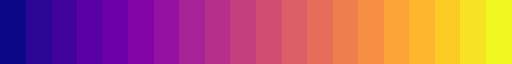

In [ ]:
plasm = cm.get_cmap('plasma',20) 
plasm

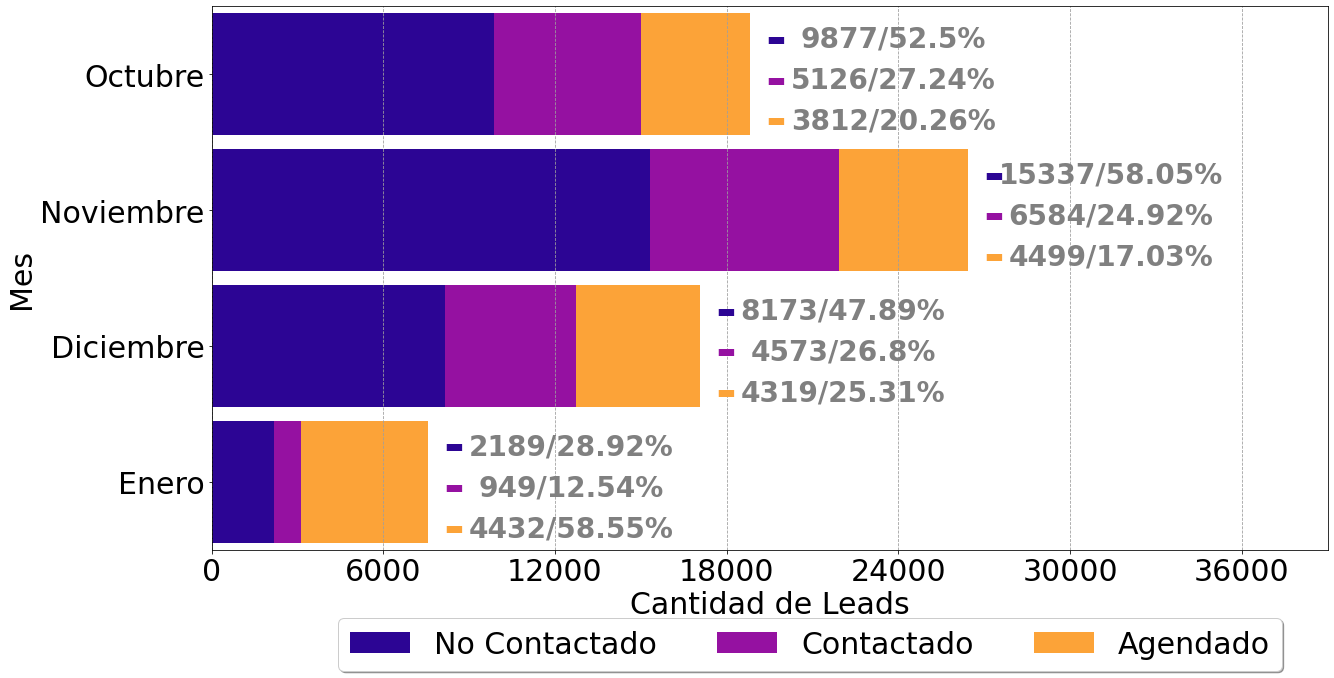

In [ ]:
mpl.rcParams['font.size']   = 30
mpl.rcParams['font.family'] = 'sans-serif'
plt.rc_context({'axes.edgecolor':'white'}) # quitar bordes a la figura
plasm = cm.get_cmap('plasma',20)           # visualize with the new_inferno colormaps
plasm = np.concatenate([[plasm.colors[1,:]], [plasm.colors[6,:]], [plasm.colors[-5,:]]], axis=0)
val[['No Contactado', 'Contactado', 'Agendado']].loc[list(np.flip(['Octubre', 'Noviembre',
                                                                    'Diciembre', 'Enero']))].plot.barh(stacked=True, figsize=(20, 10), width=0.9,
                                                                                                       color= plasm)
plt.legend(title='', ncol=3, fancybox=True, shadow=True, loc='best', bbox_to_anchor=(0.1, -0.25, 0.5, 0.5), )
plt.xticks(ticks=np.arange(0, 39001, 6000), labels=np.arange(0, 39001, 6000))
plt.grid(True, zorder=0,  axis='x', color='#9E9E9E', linestyle='--', linewidth=0.8)
plt.xlim([0, 39000])
plt.ylabel('Mes')
plt.xlabel('Cantidad de Leads')
plt.ylim([-0.5, 3.5])
tam_letra = 28

def add_value_label(x_list, x_list2, y_list, y_list2):
    for i in range(1, len(x_list)+1):
      num = str(y_list[i-1])+'/'+str(round((y_list[i-1]/y_list2[i-1])*100,2))
      plt.text(x_list2[i-1]+5000, i-0.8, num+'%', ha='center', color = 'gray', 
                weight='bold', rotation=0, fontsize = tam_letra)
      plt.text(x_list2[i-1]+900, i-0.85, '-', ha='center', color = plasm[0], 
                weight='bold', rotation=0, fontsize = 50)
      
add_value_label(np.arange(0, 4, 1), 
                val.sum(axis=1).loc[list(np.flip(['Octubre', 'Noviembre', 'Diciembre', 'Enero']))].tolist(),
                val['No Contactado'].loc[list(np.flip(['Octubre', 'Noviembre', 'Diciembre', 'Enero']))].tolist(),
                val.loc[list(np.flip(['Octubre', 'Noviembre', 'Diciembre', 'Enero']))].sum(axis=1))

def add_value_label2(x_list, x_list2, y_list, y_list2):
    for i in range(1, len(x_list)+1):
      num = str(y_list[i-1])+'/'+str(round((y_list[i-1]/y_list2[i-1])*100,2))
      plt.text(x_list2[i-1]+5000, i-1.1, num+'%', ha='center', color = 'gray', 
                weight='bold', rotation=0, fontsize = tam_letra)
      plt.text(x_list2[i-1]+900, i-1.15, '-', ha='center', color = plasm[1], 
                weight='bold', rotation=0, fontsize = 50)
      
add_value_label2(np.arange(0, 4, 1), 
                val.sum(axis=1).loc[list(np.flip(['Octubre', 'Noviembre', 'Diciembre', 'Enero']))].tolist(),
                val['Contactado'].loc[list(np.flip(['Octubre', 'Noviembre', 'Diciembre', 'Enero']))].tolist(),
                val.loc[list(np.flip(['Octubre', 'Noviembre', 'Diciembre', 'Enero']))].sum(axis=1))

def add_value_label2(x_list, x_list2, y_list, y_list2):
    for i in range(1, len(x_list)+1):
      num = str(y_list[i-1])+'/'+str(round((y_list[i-1]/y_list2[i-1])*100,2))
      plt.text(x_list2[i-1]+5000, i-1.4, num+'%', ha='center', color = 'gray', 
                weight='bold', rotation=0, fontsize = tam_letra)
      plt.text(x_list2[i-1]+900, i-1.45, '-', ha='center', color = plasm[2], 
                weight='bold', rotation=0, fontsize = 50)
      
add_value_label2(np.arange(0, 4, 1), 
                val.sum(axis=1).loc[list(np.flip(['Octubre', 'Noviembre', 'Diciembre', 'Enero']))].tolist(),
                val['Agendado'].loc[list(np.flip(['Octubre', 'Noviembre', 'Diciembre', 'Enero']))].tolist(),
                val.loc[list(np.flip(['Octubre', 'Noviembre', 'Diciembre', 'Enero']))].sum(axis=1))
plt.show()

In [ ]:
val

Gestion    Contactado  No Contactado  Agendado
mes                                           
Octubre          5126           9877      3812
Noviembre        6584          15337      4499
Diciembre        4573           8173      4319
Enero             949           2189      4432

In [ ]:
val['Contactado'].loc[list(np.flip(['Octubre', 'Noviembre', 'Diciembre', 'Enero']))]

mes
Enero         949
Diciembre    4573
Noviembre    6584
Octubre      5126
Name: Contactado, dtype: int64

In [ ]:
#@title Dias promedio para primera gestión
tiempo_Gestion_1_.Diff_Gest_1_dias.mean()

4.175485533095522

In [ ]:
#@title Dias promedio para segunda gestión
(tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Enero'].Diff_Gest_2_dias - tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Enero'].Diff_Gest_1_dias).mean()

1.2464788732394365

In [ ]:
#@title Dias promedio para tercera gestión
(tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Enero'].Diff_Gest_3_dias - tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Enero'].Diff_Gest_2_dias).mean()

1.2857142857142858

In [ ]:
(tiempo_Gestion_1_['Tipo Contacto'] )

In [ ]:
#@title Dias promedio para cuearte gestión
(tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Enero'].Diff_Gest_4_dias - tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Enero'].Diff_Gest_3_dias).mean()

0.8620689655172413

In [ ]:
#@title Dias promedio para quinta gestión
(tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Diciembre'].Diff_Gest_5_dias - tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Diciembre'].Diff_Gest_4_dias).mean()

1.2

In [ ]:
temporala.groupby(by=['dia', 'Hora'])['Cantidad'].sum()

dia    Hora
1-01   8       1
       9       2
       12      1
       13      2
       17      1
              ..
12-30  18      3
       19      2
       21      7
       22      7
       23      4
Name: Cantidad, Length: 2335, dtype: int64

# Figura de cantidad de leads por cada mes

In [ ]:
tiempo_Gestion_1_[tiempo_Gestion_1_.mes=='Octubre'].shape


(3763, 41)

In [ ]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(figsize = (15,8)) 
plasm = cm.get_cmap('plasma',20)# visualize with the new_inferno colormaps

width = 0.4
x = np.arange(len(datos_llamadas.index))
plt.grid(color='#F2F2F2', linestyle='-', linewidth=1)
rec1 = ax.bar(x-width/2, datos_llamadas['2021'].values, width, label = 'Tráfico 2021', color=plasm.colors[2,:])
rec2 = ax.bar(x+width/2, datos_llamadas['2022'].values, width, label = 'Tráfico 2022', color=plasm.colors[8,:])
rec3 = ax.bar(x-width/2, datos_llamadas['2021v'].values, width, label = 'Ventas 2021', color=plasm.colors[-7,:])
rec4 = ax.bar(x+width/2, datos_llamadas['2022v'].values, width, label = 'Ventas 2022', color=plasm.colors[-5,:])

def add_value_label(x_list, y_list, y_list2):
    for i in range(1, len(x_list)+1):
        num = str(y_list[i-1])+'/'+str(round((y_list[i-1]/y_list2)*100,2))
        plt.text(i-1.2, y_list[i-1]+7000, num+'%',ha='center', color = (plasm.colors[2,:]), weight='bold', rotation=70)

def add_value_label2(x_list, y_list, y_list1, y_list2):
    for i in range(1, len(x_list)+1): 
        num = str(y_list1[i-1])+'/'+str(round((y_list1[i-1]/y_list2[i-1])*100,2))
        plt.text(i-1.1, y_list[i-1]+3000, num+'%', ha='center', color = (plasm.colors[-7,:]), weight='bold', rotation=70)

def add_value_label3(x_list, y_list, y_list2):
    for i in range(1, len(x_list)+1):
        num = str(y_list[i-1])+'/'+str(round((y_list[i-1]/y_list2)*100,2))
        plt.text(i-0.7, y_list[i-1]+7000, num+'%',ha='center', color = (plasm.colors[8,:]), weight='bold', rotation=70)

def add_value_label4(x_list, y_list, y_list1, y_list2):
    for i in range(1, len(x_list)+1): 
        num = str(y_list1[i-1])+'/'+str(round((y_list1[i-1]/y_list2[i-1])*100,2))
        plt.text(i-0.6, y_list[i-1]+3000, num+'%', ha='center', color = (plasm.colors[-5,:]), weight='bold', rotation=70)

add_value_label(list(np.arange(0,9)),datos_llamadas['2021'].values,datos_llamadas['2021'].values.sum())
add_value_label2(list(np.arange(0,9)),datos_llamadas['2021'].values,datos_llamadas['2021v'].values,datos_llamadas['2021'].values)
add_value_label3(list(np.arange(0,9)),datos_llamadas['2022'].values,datos_llamadas['2022'].values.sum())
add_value_label4(list(np.arange(0,9)),datos_llamadas['2022'].values,datos_llamadas['2022v'].values,datos_llamadas['2022'].values)

ax.set_xticks(ticks=list(np.arange(0,len(datos_llamadas.index),1)))
ax.set_xticklabels(datos_llamadas.index)

fig.tight_layout()
plt.ylim([0,160000])
plt.legend(['Tráfico 2021','Tráfico 2022','Ventas 2021','Ventas 2022'])
plt.show()

# Fechas organizadas por contactos en franjas horarias 8 am a 7 pm

In [ ]:
tiempo_Gestion_1_['Fecha primera gestión Contact Center']

In [ ]:
df_m_['PRIMERA']

In [ ]:
#@title Datos organizados por la base de datos version 2 con fecha de agendamiento
tiempo_Gestion_1_['Hora'] = 0
tiempo_Gestion_1_['dia'] = 0

# Fecha Creado
tiempo_Gestion_1_['Hora'] = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
tiempo_Gestion_1_['dia'] = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
tiempo_Gestion_1_.Hora = tiempo_Gestion_1_.Hora.astype(int)
temporal = tiempo_Gestion_1_.groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal.rename(columns={'size':'Cantidad'}, inplace=True)

df_m_.Created = df_m_.Created.astype('object')
df_m_['Hora'] = 0
df_m_['dia']  = 0
df_m_['Hora'] = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
# df_m_['Hora_'] = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%X'))
df_m_['dia']  = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))

df_m_['Hora_1'] = 0
df_m_['dia_1']  = 0
df_m_['Hora_1'][df_m_['PRIMERA'].notna()] = df_m_['PRIMERA'][df_m_['PRIMERA'].notna()].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
# df_m_['Hora_'] = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%X'))
df_m_['dia'][df_m_['PRIMERA'].notna()]  = df_m_['PRIMERA'][df_m_['PRIMERA'].notna()].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
df_m_.Hora_1[df_m_['PRIMERA'].notna()]  = df_m_.Hora_1[df_m_['PRIMERA'].notna()].astype(int)

df_m_['Hora_2'] = 0
df_m_['dia_2']  = 0
df_m_['Hora_2'][df_m_['SEGUNDA'].notna()] = df_m_['SEGUNDA'][df_m_['SEGUNDA'].notna()].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
# df_m_['Hora_'] = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%X'))
df_m_['dia_2'][df_m_['SEGUNDA'].notna()]  = df_m_['SEGUNDA'][df_m_['SEGUNDA'].notna()].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
df_m_.Hora_2[df_m_['SEGUNDA'].notna()]  = df_m_.Hora_2[df_m_['SEGUNDA'].notna()].astype(int)

df_m_['Hora_3'] = 0
df_m_['dia_3']  = 0
df_m_['Hora_3'][df_m_['TERCERA'].notna()] = df_m_['TERCERA'][df_m_['TERCERA'].notna()].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
# df_m_['Hora_'] = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%X'))
df_m_['dia_3'][df_m_['TERCERA'].notna()]  = df_m_['TERCERA'][df_m_['TERCERA'].notna()].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
df_m_.Hora_3[df_m_['TERCERA'].notna()]  = df_m_.Hora_3.astype(int)

df_m_['Hora_4'] = 0
df_m_['dia_4']  = 0
df_m_['Hora_4'][df_m_['CUARTA'].notna()] = df_m_['CUARTA'][df_m_['CUARTA'].notna()].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
# df_m_['Hora_'] = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%X'))
df_m_['dia_4'][df_m_['CUARTA'].notna()]  = df_m_['CUARTA'][df_m_['CUARTA'].notna()].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
df_m_.Hora_4[df_m_['CUARTA'].notna()]  = df_m_.Hora_4[df_m_['CUARTA'].notna()].astype(int)

df_m_['Hora_5'] = 0
df_m_['dia_5']  = 0
df_m_['Hora_5'][df_m_['QUINTA'].notna()] = df_m_['QUINTA'][df_m_['QUINTA'].notna()].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
# df_m_['Hora_'] = df_m_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%X'))
df_m_['dia_5'][df_m_['QUINTA'].notna()]  = df_m_['QUINTA'][df_m_['QUINTA'].notna()].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
df_m_.Hora_5[df_m_['QUINTA'].notna()]  = df_m_.Hora_5[df_m_['QUINTA'].notna()].astype(int)


# Fecha primer conotacto
temporal_1 = df_m_[df_m_['PRIMERA'].notna()].groupby(by=['dia_1', 'Hora_1', 'mes'], as_index=False, )['dia_1', 'Hora_1'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_1.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha segundo conotacto
temporal_2 = df_m_[df_m_['SEGUNDA'].notna()].groupby(by=['dia_2', 'Hora_2', 'mes'], as_index=False, )['dia_2', 'Hora_2'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_2.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha tercera conotacto
temporal_3 = df_m_[df_m_['TERCERA'].notna()].groupby(by=['dia_3', 'Hora_3', 'mes'], as_index=False, )['dia_3', 'Hora_3'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_3.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha cuarta conotacto
temporal_4 = df_m_[df_m_['CUARTA'].notna()].groupby(by=['dia_4', 'Hora_4', 'mes'], as_index=False, )['dia_4', 'Hora_4'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_4.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha quinta conotacto
temporal_5 = df_m_[df_m_['QUINTA'].notna()].groupby(by=['dia_5', 'Hora_5', 'mes'], as_index=False, )['dia_5', 'Hora_5'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_5.rename(columns={'size':'Cantidad'}, inplace=True)

<ipython-input-53-55c30b3a221e>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-53-55c30b3a221e>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-55c30b3a221e>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-55c30b3a221e>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-55c30b3a221e>

In [ ]:
#@title Datos organizados por la base de datos version 1 fecha de creación
tiempo_Gestion_1_['Hora'] = 0
tiempo_Gestion_1_['dia'] = 0

# Fecha Creado
tiempo_Gestion_1_['Hora'] = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
tiempo_Gestion_1_['dia'] = tiempo_Gestion_1_['Created'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
tiempo_Gestion_1_.Hora = tiempo_Gestion_1_.Hora.astype(int)

# Fecha de gestion 1
tiempo_Gestion_1_['Hora_1'] = tiempo_Gestion_1_['Fecha primera gestión Contact Center'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
tiempo_Gestion_1_['dia_1'] = tiempo_Gestion_1_['Fecha primera gestión Contact Center'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
tiempo_Gestion_1_.Hora_1 = tiempo_Gestion_1_.Hora_1.astype(int)

# Fecha de gestion 2
tiempo_Gestion_1_['Hora_2'] = tiempo_Gestion_1_['Fecha segunda gestión Contact Center'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
tiempo_Gestion_1_['dia_2'] = tiempo_Gestion_1_['Fecha segunda gestión Contact Center'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
tiempo_Gestion_1_.Hora_2 = tiempo_Gestion_1_.Hora_2.astype(int)

# Fecha de gestion 3
tiempo_Gestion_1_['Hora_3'] = tiempo_Gestion_1_['Fecha tercera gestión Contact Center'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
tiempo_Gestion_1_['dia_3'] = tiempo_Gestion_1_['Fecha tercera gestión Contact Center'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
tiempo_Gestion_1_.Hora_3 = tiempo_Gestion_1_.Hora_3.astype(int)

# Fecha de gestion 4
tiempo_Gestion_1_['Hora_4'] = tiempo_Gestion_1_['Fecha cuarta gestión Contact Center'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
tiempo_Gestion_1_['dia_4'] = tiempo_Gestion_1_['Fecha cuarta gestión Contact Center'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
tiempo_Gestion_1_.Hora_4 = tiempo_Gestion_1_.Hora_4.astype(int)

# Fecha de gestion 5
tiempo_Gestion_1_['Hora_5'] = tiempo_Gestion_1_['Fecha quinta gestión Contact Center'].apply(lambda x: pd.to_datetime(x).strftime('%-H'))
tiempo_Gestion_1_['dia_5'] = tiempo_Gestion_1_['Fecha quinta gestión Contact Center'].apply(lambda x: pd.to_datetime(x).strftime('%-m-%d'))
tiempo_Gestion_1_.Hora_5 = tiempo_Gestion_1_.Hora_5.astype(int)

# Datos para el seguimiento
temporal = tiempo_Gestion_1_.groupby(by=['dia', 'Hora', 'mes'], as_index=False, )['dia', 'Hora'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal.rename(columns={'size':'Cantidad'}, inplace=True)
# temporal.sort_values(by=[''])
# temporal

# Fecha primer conotacto
temporal_1 = tiempo_Gestion_1_[tiempo_Gestion_1_['Primera gestión Contact Center']=='Agendado'].groupby(by=['dia_1', 'Hora_1', 'mes'], as_index=False, )['dia_1', 'Hora_1'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_1.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha segundo conotacto
temporal_2 = tiempo_Gestion_1_[tiempo_Gestion_1_['Segunda gestión Contact Center']=='Agendado'].groupby(by=['dia_2', 'Hora_2', 'mes'], as_index=False, )['dia_2', 'Hora_2'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_2.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha tercera conotacto
temporal_3 = tiempo_Gestion_1_[tiempo_Gestion_1_['Tercera gestión Contact Center']=='Agendado'].groupby(by=['dia_3', 'Hora_3', 'mes'], as_index=False, )['dia_3', 'Hora_3'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_3.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha cuarta conotacto
temporal_4 = tiempo_Gestion_1_[tiempo_Gestion_1_['Cuarta gestión Contact Center']=='Agendado'].groupby(by=['dia_4', 'Hora_4', 'mes'], as_index=False, )['dia_4', 'Hora_4'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_4.rename(columns={'size':'Cantidad'}, inplace=True)

# Fecha quinta conotacto
temporal_5 = tiempo_Gestion_1_[tiempo_Gestion_1_['Quinta gestión Contact Center']=='Agendado'].groupby(by=['dia_5', 'Hora_5', 'mes'], as_index=False, )['dia_5', 'Hora_5'].size() # .count().unstack().T.fillna(0).astype(int).values
temporal_5.rename(columns={'size':'Cantidad'}, inplace=True)

In [ ]:
df_m_.mes.value_counts()

In [ ]:
tem = pd.DataFrame()
temporal_1.groupby(by=['dia_1', 'Hora_1'])['Hora_1'].count().unstack().fillna(0).astype(int).T.sum(axis=1)

In [ ]:
temporal_1.Cantidad.sum()

17037

In [ ]:
temporal_1.groupby(by=['Hora_1'])['Cantidad'].sum()

Hora_1
0.0        1
2.0        1
8.0     1557
9.0     1917
10.0    2026
11.0    2221
12.0    1972
13.0    1777
14.0    1641
15.0    1560
16.0    1358
17.0     714
18.0     270
19.0      16
21.0       1
22.0       2
23.0       3
Name: Cantidad, dtype: int64

In [ ]:
#Reading the dataset
# bill_dataframe = sns.load_dataset("tips")
# Tamaño de la letra
# plt.rc_context({'axes.edgecolor':'black'})
mpl.rcParams['font.size'] = 58
mpl.rcParams['font.family'] = 'sans-serif'
plt.rc_context({'axes.edgecolor':'white'}) # quitar bordes a la figura
plasm = cm.get_cmap('plasma',20) # visualize with the new_inferno colormaps
#Creating bubble plot
Dim_x = 80 #@param {type:"number"}
Dim_y = 20  #@param {type:"number"}
# # Tamaño de las barras
W_barras = 0.95 #@param {type:"number"}
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(Dim_x, Dim_y))
fig = plt.figure(figsize=(Dim_x, Dim_y),  dpi=300)
gs1 = gridspec.GridSpec(2, 2, width_ratios=[3, 0.2], height_ratios=[6, 1])
gs1.update(wspace=0.03, hspace=0.25)

ax1_ = plt.subplot(gs1[0, 0])
# ax2_ = plt.subplot(gs1[0, 1])
# ax3_ = plt.subplot(gs1[1, 0])
mes_ = 'Octubre'
temporal_ = pd.DataFrame()
for i in meses:
  temporal_ = pd.concat([temporal_, temporal[temporal.mes==i]], axis=0)
temporala = temporal_.copy()
temporala = temporala

# temporal = tiempo_Gestion_1_.groupby(by=['dia', 'Hora'], as_index=False).size()
# temporal.rename(columns={'size':'Cantidad'}, inplace=True)
sns.scatterplot(data=temporala, x="dia", y="Hora", size="Cantidad", 
                hue="Cantidad", palette='plasma', sizes = (1000, 800), 
                linewidth=2.7, marker="o", alpha = 0.01, ax=ax1_, 
                )
size_ = 20
sns.scatterplot(data=temporal_1, x="dia_1", y="Hora_1", 
                palette='orange', sizes = (1000, 800), size= size_,
                marker="^", alpha = 0.9, ax=ax1_, 
                label='Gestión 1')
sns.scatterplot(data=temporal_2, x="dia_2", y="Hora_2", 
                palette='green', sizes = (1000, 800), size= size_,
                marker=">", alpha = 0.9, ax=ax1_, 
                label='Gestión 2')
sns.scatterplot(data=temporal_3, x="dia_3", y="Hora_3", 
                palette='slate blue', sizes = (1000, 800), size= size_,
                marker="v", alpha = 0.9, ax=ax1_, 
                label='Gestión 3')
sns.scatterplot(data=temporal_4, x="dia_4", y="Hora_4",
                palette='red', sizes = (1000, 800), size= size_,
                marker="<", alpha = 0.9, ax=ax1_, 
                label='Gestión 4')
sns.scatterplot(data=temporal_5, x="dia_5", y="Hora_5", 
                palette='violet', sizes = (1000, 800), size= size_,
                marker="^", color='gray', alpha = 0.9, ax=ax1_, 
                label='Gestión 5')
# plt.legend()
# ax1_.legend(False#['80', '160', '240', '320', '400'], 
            # loc=1,
            # box_to_anchor=(1, 0.2, 0.5, 0.5)
            # )
#, '1-Gestión', '2-Gestión',
# ax1.legend(['1-Gestión'])
#             '3-Gestión', '4-Gestión', '5-Gestión'])
# ax1_.set_xticks(rotation=90)
# ax1_.legend(loc='best', bbox_to_anchor=(0.69, 0.4, 0.5, 0.5))
#Adding the aesthetics
# ax1_.set_title('Contactabilidad', fontsize=14)
# ax1_.set_xlabel('Días', fontsize=14)
# ax1_.set_ylabel('Horas', fontsize=14)
ax1_.set_xlabel('')
ax1_.set_ylabel('')
# ax1_.set_xticks(fontsize=14)
# ax1_.set_yticks(fontsize=14)
# ax_ = plt.gca()
# ax1_.invert_yaxis()
ax1_.set_yticks(ticks=list(np.arange(0, 24, 1)))
ax1_.set_xticks(ticks=list(np.arange(0, 119, 2)))
ax1_.set_xticklabels(labels=pd.DataFrame(temporala.dia.unique())[0].apply(lambda x:x[-2:])[::2])
ax1_.tick_params(axis='x', labelrotation=90)
ax1_.set(xlim=(-0.5, 119.5))
ax1_.set(ylim=(7.5, 19.5))
ax1_.plot([89.5, 89.5], [-2, 30], marker='s', ms=20, color='orange',
          linewidth=2, linestyle='--')
ax1_.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=2, ncol=13, 
            borderaxespad=0., labelspacing=0.01)
# ax1_.get_legend().remove()
ax1_.legend([])

# # figure 2
# tem = temporala.groupby(by=['dia', 'Hora'])['Hora'].count().unstack().fillna(0).astype(int).T.sum(axis=1)
# datos_tem = pd.DataFrame({'Cantidad gestión':list(np.zeros((24)).astype(int))})
# a = 0
# for i in tem.index.tolist():
#   datos_tem.iloc[i] = tem.iloc[a]
#   a+=1
# datos_tem.plot(kind='barh', ax=ax2_, color=plasm.colors[2,:])
# ax2_.grid(True, zorder=0,  axis='x', color='#9E9E9E', linestyle='--', linewidth=0.8)
# # ax2_.set_yticks(ticks=[])
# ax2_.set_ylabel('')
# ax2_.set(ylim=(7.5, 19.5))
# ax2_.set_xticks(ticks=list(np.arange(1, tem.max()+10, 29)))
# ax2_.set(xlim=(0, tem.max()+10))
# ax2_.set_xlabel('Cantidad')
# ax2_.legend([])
# ax2_.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
# handles, labels = ax1_.get_legend_handles_labels()
# fig.legend(handles, labels, loc="best", bbox_to_anchor=(0.95,1.05))
plt.show()

In [ ]:
temporal_1

# Otra figura 

In [ ]:
lista_gest.append('dia')

In [ ]:
lista_gest

['Primera gestión Contact Center',
 'Segunda gestión Contact Center',
 'Tercera gestión Contact Center',
 'Cuarta gestión Contact Center',
 'Quinta gestión Contact Center',
 'mes',
 'dia']

In [ ]:
Datos_org_fechas = tiempo_Gestion_1_.groupby(by=lista_gest, as_index=False, )['dia'].size().sort_values(by=['dia']).reset_index(drop=True).groupby(by=lista_gest[:6], as_index=False, )[lista_gest[:5]].size()
Datos_org_fechas

Primera gestión Contact Center Segunda gestión Contact Center  \
0                         Agendado                       Agendado   
1                         Agendado                     Contactado   
2                         Agendado                     Contactado   
3                         Agendado                     Contactado   
4                         Agendado                     Contactado   
..                             ...                            ...   
146                Volver a llamar                Volver a llamar   
147                Volver a llamar                Volver a llamar   
148                Volver a llamar                Volver a llamar   
149                Volver a llamar                Volver a llamar   
150                Volver a llamar                Volver a llamar   

    Tercera gestión Contact Center Cuarta gestión Contact Center  \
0                       Contactado                    Contactado   
1                       Contactado                    Contactado   
2                       Contactado                    Contactado   
3                       Contactado                    Contactado   
4                       Contactado                    Contactado   
..                             ...                           ...   
146                  No Contactado                 No Contactado   
147                  No Contactado                 No Contactado   
148                  No Contactado                 No Contactado   
149                Volver a llamar                    Contactado   
150                Volver a llamar                 No Contactado   

    Quinta gestión Contact Center        mes  size  
0                      Contactado    Octubre     1  
1                      Contactado  Diciembre    12  
2                      Contactado      Enero    21  
3                      Contactado  Noviembre    21  
4                      Contactado    Octubre    15  
..                            ...        ...   ...  
146                 No Contactado  Noviembre    13  
147                 No Contactado    Octubre    16  
148               Volver a llamar    Octubre     1  
149                    Contactado      Enero     1  
150                 No Contactado  Noviembre     1  

[151 rows x 7 columns]

In [ ]:
lista_gest_ = ['PRIMERA', 'SEGUNDA', 'TERCERA', 'CUARTA', 'QUINTA', 'mes', 'dia']

In [ ]:
df_m_['FECHA AGENDAMIENTO']

(3812,)

In [ ]:
df_m_['PRIMERA'].notna().sum()

17037

In [ ]:
df_m_[df_m_.mes=='OCTUBRE'].shape

(3812, 42)

In [ ]:
df_m_.groupby(by=lista_gest_, as_index=False, )['dia'].size().notna().sum()

In [ ]:
Datos_org_fechas = df_m_.groupby(by=lista_gest_, as_index=False, )['dia'].size().sort_values(by=['dia']).reset_index(drop=True).groupby(by=lista_gest_[:6], as_index=False, )[lista_gest_[:5]].size()
Datos_org_fechas

In [ ]:
df_m.shape

(53743, 130)

In [ ]:
tiempo_Gestion_1_.shape

(13974, 51)

In [ ]:
df_m_.shape

(17062, 42)

In [ ]:
!ls

ejemplo2.csv	     file.html		      my_data.json
ejemplo.csv	     file.svg		      Noviembre2022-Enero2022_v1
Figura_Octubre.html  Marzo2021-Noviembre2022  Noviembre2022-Enero2023_v2


In [ ]:
fig = px.parallel_categories(Datos_org_fechas[Datos_org_fechas.mes=='Octubre'], dimensions=lista_gest[:5], 
                             color='size', color_continuous_scale=px.colors.sequential.Plasma,
                            #  labels={'sex':'sex', 'Smoker':'Smoker at the table', 'day':'Day of week'}
                             )
fig.show()

In [ ]:
fig = px.parallel_categories(Datos_org_fechas[Datos_org_fechas.mes=='Noviembre'], dimensions=lista_gest[:5], 
                             color='size', color_continuous_scale=px.colors.sequential.Plasma,
                            #  labels={'sex':'sex', 'Smoker':'Smoker at the table', 'day':'Day of week'}
                             )
fig.show()

In [ ]:
fig = px.parallel_categories(Datos_org_fechas[Datos_org_fechas.mes=='Diciembre'], dimensions=lista_gest[:5], 
                             color='size', color_continuous_scale=px.colors.sequential.Plasma,
                            #  labels={'sex':'sex', 'Smoker':'Smoker at the table', 'day':'Day of week'}
                             )
fig.show()

In [ ]:
fig = px.parallel_categories(Datos_org_fechas[Datos_org_fechas.mes=='Enero'], dimensions=lista_gest[:5], 
                             color='size', color_continuous_scale=px.colors.sequential.Plasma,
                            #  labels={'sex':'sex', 'Smoker':'Smoker at the table', 'day':'Day of week'}
                             )
fig.show()

In [ ]:
fig = px.parallel_categories(Datos_org_fechas, dimensions=lista_gest[:5], 
                             color='size', color_continuous_scale=px.colors.sequential.Plasma,
                            #  labels={'sex':'sex', 'Smoker':'Smoker at the table', 'day':'Day of week'}
                             )
fig.show()

# ejemplos

In [ ]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [ ]:
df = px.data.tips()
fig = px.parallel_categories(df, dimensions=['sex', 'smoker', 'day'],
                             color='size', color_continuous_scale=px.colors.sequential.Plasma,
                             labels={'sex':'sex', 'Smoker':'Smoker at the table', 'day':'Day of week'}
                             )
fig.show()

In [ ]:
tiempo_Gestion_1_.groupby(by=['dia', ''])['dia'].count()

dia
1-01      10
1-02      12
1-03      13
1-04      24
1-05      54
        ... 
12-26    137
12-27    134
12-28     94
12-29     84
12-30     73
Name: dia, Length: 120, dtype: int64

In [ ]:
px.parallel_categories(temporal, dimensions=['dia', 'Hora'], color_continuous_scale=px.colors.sequential.Plasma, color='Cantidad')

In [ ]:
df[['sepal_length', 'sepal_width', 'petal_width']]

sepal_length  sepal_width  petal_width
0             5.1          3.5          0.2
1             4.9          3.0          0.2
2             4.7          3.2          0.2
3             4.6          3.1          0.2
4             5.0          3.6          0.2
..            ...          ...          ...
145           6.7          3.0          2.3
146           6.3          2.5          1.9
147           6.5          3.0          2.0
148           6.2          3.4          2.3
149           5.9          3.0          1.8

[150 rows x 3 columns]

In [ ]:
fig = px.parallel_categories(df, dimensions=['sepal_length', 'sepal_width', 'petal_width'], 
                             color='species_id', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_categories(df, dimensions=['sepal_length', 'sepal_width', 'petal_width'], color='species_id', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

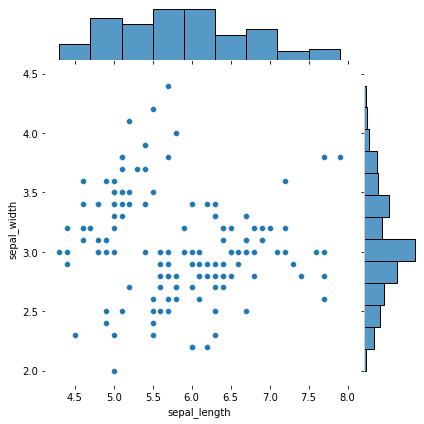

In [ ]:
iris_dataframe = sns.load_dataset('iris')
#Creating marginal graphs
sns.jointplot(x=iris_dataframe["sepal_length"], y=iris_dataframe["sepal_width"], kind='scatter')
# Show the plot
plt.show()

In [ ]:
#Reading the dataset
bill_dataframe = sns.load_dataset("tips")
#Creating bubble plot
sns.scatterplot(data=bill_dataframe, x="total_bill", y="tip", hue="size", 
                size="size", palette='plasma')
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

In [ ]:
#Creating bubble plot
plt.figure(figsize=(45,10))

In [ ]:
tiempo_Gestion_1_.head().columns

In [ ]:
tiempo_Gestion_1_[tiempo_Gestion_1_['Tipo Contacto']!=0].groupby(by=['Tipo Contacto', 'mes'])['Tipo Contacto'].count().unstack()

mes               Diciembre  Enero  Noviembre  Octubre
Tipo Contacto                                         
Llamada Inbound           2      5          2       19
Llamada Outbound       3264   1499       5158     3443
Whatsapp                 26      2         23        2

Valor pareto: 100.0 Con primeras 2 Salas de ventas


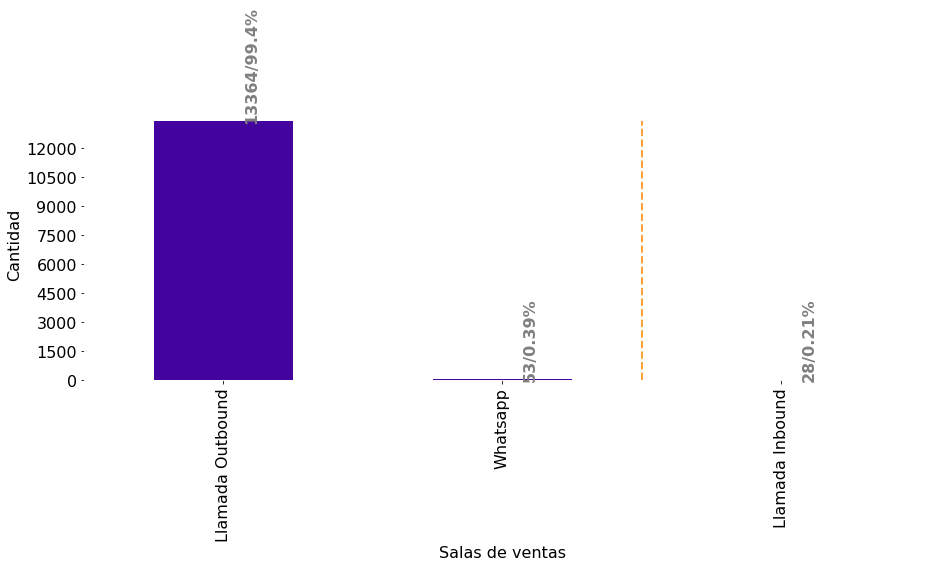

In [ ]:
#@title Figura con la cantidad de solicitudes según las salas de ventas { run: "auto", vertical-output: true }
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(figsize = (15,8))
plasm = cm.get_cmap('plasma',20)# visualize with the new_inferno colormaps
tiempo_Gestion_1_[tiempo_Gestion_1_['Tipo Contacto']!=0].groupby(by=['Tipo Contacto'])['Tipo Contacto'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), color=plasm.colors[2])

#@markdown Pareto 
cantidad = 2 #@param {type:"integer"}
valor_pareto = ((tiempo_Gestion_1_.groupby(by=['Sales Pipeline'])['Sales Pipeline'].count().sort_values(ascending=False)/tiempo_Gestion_1_.groupby(by=['Sales Pipeline'])['Sales Pipeline'].count().sort_values(ascending=False).sum())*100)[:cantidad].sum()
print('Valor pareto: '+str(valor_pareto)+' Con primeras '+str(cantidad)+' Salas de ventas')
#@markdown ---
def add_value_label(x_list, y_list, y_list2):
    for i in range(1, len(x_list)+1):
        num = str(y_list[i-1])+'/'+str(round((y_list[i-1]/y_list2)*100,2))
        plt.text(i-0.9, y_list[i-1]+50, num+'%',ha='center', color='gray', weight='bold', rotation=90)
add_value_label(list(np.arange(0, tiempo_Gestion_1_[tiempo_Gestion_1_['Tipo Contacto']!=0].groupby(by=['Tipo Contacto'])['Tipo Contacto'].count().sort_values(ascending=False).values.shape[0])), 
                tiempo_Gestion_1_[tiempo_Gestion_1_['Tipo Contacto']!=0].groupby(by=['Tipo Contacto'])['Tipo Contacto'].count().sort_values(ascending=False).values.tolist(),
                tiempo_Gestion_1_[tiempo_Gestion_1_['Tipo Contacto']!=0].groupby(by=['Tipo Contacto'])['Tipo Contacto'].count().sort_values(ascending=False).values.sum())
plt.plot([cantidad-0.5, cantidad-0.5], [0, tiempo_Gestion_1_[tiempo_Gestion_1_['Tipo Contacto']!=0].groupby(by=['Tipo Contacto'])['Tipo Contacto'].count().max()+10], '--', label='line 1', linewidth=2, color=plasm.colors[-5,:])
# plt.ylim([0, 2800])
plt.yticks(ticks=np.arange(0, tiempo_Gestion_1_[tiempo_Gestion_1_['Tipo Contacto']!=0].groupby(by=['Tipo Contacto'])['Tipo Contacto'].count().max()+10, 1500))
plt.ylabel('Cantidad')
plt.xlabel('Salas de ventas')
plt.show()

Valor pareto: 100.0 Con primeras 15 Salas de ventas


<ipython-input-33-ac757313ef71>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-33-ac757313ef71>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-33-ac757313ef71>:17: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-33-ac757313ef71>:18: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-33-ac757313ef71>:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



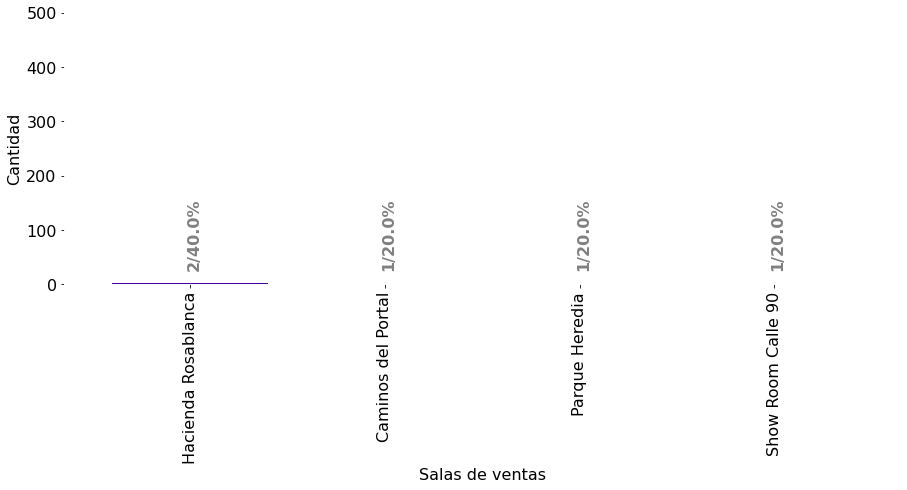

In [ ]:
#@title Figura con la cantidad de solicitudes según las salas de ventas { run: "auto", vertical-output: true }
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(figsize = (15,8))
plasm = cm.get_cmap('plasma',20)# visualize with the new_inferno colormaps
tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Sala de ventas Oportunidad'])['Sala de ventas Oportunidad'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), color=plasm.colors[2], width=0.8)

#@markdown Pareto 
cantidad = 15 #@param {type:"integer"}
valor_pareto = ((tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Sala de ventas Oportunidad'])['Sala de ventas Oportunidad'].count().sort_values(ascending=False)/tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Sala de ventas Oportunidad'])['Sala de ventas Oportunidad'].count().sort_values(ascending=False).sum())*100)[:cantidad].sum()
print('Valor pareto: '+str(valor_pareto)+' Con primeras '+str(cantidad)+' Salas de ventas')
#@markdown ---
def add_value_label(x_list, y_list, y_list2):
    for i in range(1, len(x_list)+1):
        num = str(y_list[i-1])+'/'+str(round((y_list[i-1]/y_list2)*100,2))
        plt.text(i-0.98, y_list[i-1]+30, num+'%',ha='center', color = 'gray', weight='bold', rotation=90)
add_value_label(list(np.arange(0,tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Sala de ventas Oportunidad'])['Sala de ventas Oportunidad'].count().sort_values(ascending=False).values.shape[0])), 
                tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Sala de ventas Oportunidad'])['Sala de ventas Oportunidad'].count().sort_values(ascending=False).values.tolist(),
                tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Sala de ventas Oportunidad'])['Sala de ventas Oportunidad'].count().sort_values(ascending=False).values.sum())
plt.plot([cantidad-0.5, cantidad-0.5], [0, 15000], '--', label='line 1', linewidth=2, color=plasm.colors[-5,:])
plt.ylim([0, 500])
plt.yticks(ticks=np.arange(0, 501, 100))
plt.ylabel('Cantidad')
plt.xlabel('Salas de ventas')
plt.show()

In [ ]:
tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Tipo de visita'])['Tipo de visita'].count().sort_values(ascending=False)

<ipython-input-41-bb87e6199a1e>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Tipo de visita
0          3
Virtual    2
Name: Tipo de visita, dtype: int64

<ipython-input-156-227ebcf9a8bd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-227ebcf9a8bd>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-156-227ebcf9a8bd>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-156-227ebcf9a8bd>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-156-227ebcf9a8bd>:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-156-227ebcf9a8bd>:15: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-156-227ebcf9a8bd>:16: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



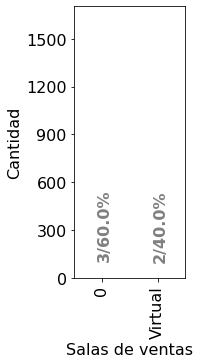

In [ ]:
#@title Cantidad de Visita programadas activas con los registros abiertos { run: "auto", vertical-output: true }
plasm = cm.get_cmap('plasma',20) # visualize with the new_inferno colormaps
df_m['Tipo de visita'][df_m['Tipo de visita'].isna()] = 'N/A'
tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Tipo de visita'])['Tipo de visita'].count().plot(kind='bar', figsize=(2,5), color=plasm.colors[2])

#@markdown ---
def add_value_label(x_list, y_list, y_list2):
    for i in range(1, len(x_list)+1):
        num = str(y_list[i-1])+'/'+str(round((y_list[i-1]/y_list2)*100,2))
        plt.text(i-0.95, y_list[i-1]+120, num+'%',ha='center', color = 'gray', weight='bold', rotation=90)
add_value_label(list(np.arange(0,tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Tipo de visita'])['Tipo de visita'].count().sort_values(ascending=False).values.shape[0])), 
                tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Tipo de visita'])['Tipo de visita'].count().sort_values(ascending=False).values.tolist(),
                tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Tipo de visita'])['Tipo de visita'].count().sort_values(ascending=False).values.sum())

plt.ylim([0, tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Tipo de visita'])['Tipo de visita'].count().max()+1700])
plt.yticks(ticks=np.arange(0, tiempo_Gestion_1_[tiempo_Gestion_1_.Status=='Open'][tiempo_Gestion_1_['Sala de ventas Oportunidad']!=0][tiempo_Gestion_1_['Tipo de visita']!='N/A'].groupby(by=['Tipo de visita'])['Tipo de visita'].count().max()+1701, 300))
plt.ylabel('Cantidad')
plt.xlabel('Salas de ventas')
plt.show()

In [ ]:
i = 0
nombres_ =  tiempo_Gestion_1[lista_gest[i]][tiempo_Gestion_1[lista_diff[i]].notna()][tiempo_Gestion_1[lista_gest[i]]!=0].value_counts().index.tolist()
datos_ = pd.DataFrame()
for i in range(len(lista_diff)):
  datos = pd.DataFrame(tiempo_Gestion_1[lista_gest[i]][tiempo_Gestion_1[lista_diff[i]].notna()][tiempo_Gestion_1[lista_gest[i]]!=0].value_counts()).T
  datos_= datos_.append(datos[nombres_])


In [ ]:
#@title Visualización de las cantidades para las gestiones
i = 0
nombres_ =  tiempo_Gestion_1[lista_gest[i]][tiempo_Gestion_1[lista_diff[i]].notna()][tiempo_Gestion_1[lista_gest[i]]!=0].value_counts().index.tolist()
datos_ = pd.DataFrame()
for i in range(len(lista_diff)):
  datos = pd.DataFrame(tiempo_Gestion_1[lista_gest[i]][tiempo_Gestion_1[lista_diff[i]].notna()][tiempo_Gestion_1[lista_gest[i]]!=0].value_counts()).T
  datos_= datos_.append(datos[nombres_])

datos_ = datos_.T
datos_.rename(columns={'Primera gestión Contact Center':'Primera gestión'}, inplace=True)
datos_.rename(columns={'Segunda gestión Contact Center':'Segunda gestión'}, inplace=True)
datos_.rename(columns={'Tercera gestión Contact Center':'Tercera gestión'}, inplace=True)
datos_.rename(columns={'Cuarta gestión Contact Center':'Cuarta gestión'}, inplace=True)
datos_.rename(columns={'Quinta gestión Contact Center':'Quinta gestión'}, inplace=True)
datos_ = datos_.T
datos_ = datos_.T[np.flip(['Primera gestión', 'Segunda gestión', 'Tercera gestión', 'Cuarta gestión', 'Quinta gestión'])].T
# visualización de conteos en la gestión según contacto o no contacto
# data_table.DataTable(datos_, include_index=True, num_rows_per_page=10)
fig, ax = plt.subplots(figsize = (15, 6))
ax = sns.heatmap(datos_, ax=ax, annot=True, annot_kws={"size": 16}, cbar=True, 
            cbar_kws=dict(use_gridspec=False, location="right", pad=0.01, shrink=1, 
                          ticks=list(np.arange(0, datos_.max().max(), 820))),
            cmap='plasma', square=True, vmin=0, vmax=datos_.max().max(),
            fmt="") # center=0 para centralizar los colores de la figura

# ax.xaxis.tick_top() # ubicación de los xticks en la parte superior
plt.xticks(rotation=90)
# fig.tight_layout()
plt.show()

In [ ]:
#@title tabla organizada con estrutura de filtro 
data_table.enable_dataframe_formatter() # tabla organizada 
datos_

Contactado  No Contactado  Volver a llamar  \
Primera gestión Contact Center        7210           1611             1427   
Segunda gestión Contact Center         675            976              167   

                                Agendado  
Primera gestión Contact Center       168  
Segunda gestión Contact Center         7

In [ ]:
#@title Ver variaciones de las respuestas de los agendamientos 
tiempo_Gestion_1.shape

In [ ]:
tiempo_Gestion_1.Diff_Gest_1_mes[tiempo_Gestion_1.Diff_Gest_1_mes.notna()][tiempo_Gestion_1.Diff_Gest_1_mes<=0].shape

In [ ]:
#@title Figura de comparación porcentual de la respuesta 
r = list(np.arange(0, 5, 1))
totals = datos_.sum(axis=1).values.tolist()
plasm = cm.get_cmap('plasma', 20) # visualize with the new_inferno colormaps
datos_2 = datos_.copy()
for i in range(5):
  datos_2.iloc[i,:] = datos_.iloc[i,:]/totals[i]*100

# From raw value to percentage
datos_g1 = datos_2.iloc[:,0]
datos_g2 = datos_2.iloc[:,1]
datos_g3 = datos_2.iloc[:,2]
datos_g4 = datos_2.iloc[:,3]

barWidth  = 0.85
names     = datos_.T.columns

fig = plt.figure()
ax  = fig.add_subplot(111)

# Create No contacto
ax.barh(r, datos_g1, color=plasm.colors[2,:], edgecolor='white', height=barWidth, align='center',
        tick_label=datos_g1)

# Create Agendado
ax.barh(r, datos_g2, left=datos_g1, color=plasm.colors[8,:], edgecolor='white', 
        height=barWidth)

# Create Cntacto 
ax.barh(r, datos_g3, left=[i+j for i,j in zip(datos_g1, datos_g2)], 
        color=plasm.colors[-10,:], edgecolor='white', height=barWidth)

# Volver a llamar
ax.barh(r, datos_g4, left=[i+j+k for i,j,k in zip(datos_g1, datos_g2, datos_g3)], 
        color=plasm.colors[-5,:], edgecolor='white', height=barWidth)

# Custom x axis
plt.yticks(r, [])
# plt.xticks(ticks=np.arange(0, 10, 20))

#Adding the aesthetics
# plt.title('Chart title')
# plt.ylabel('Gestiones')
plt.xlabel('% de las llamadas')  
# plt.xticks(rotation = 90)
ax.legend(datos_2.columns, loc='best', bbox_to_anchor=(1, 0.45, 0.5, 0.5),
        borderaxespad=0, frameon=True, fancybox=True,
        ncol=1, shadow=True).get_frame().set_alpha(0.5)
ax.tick_params(direction='out', length=6, width=1, colors='black', 
               grid_color='r', grid_alpha=0.5, )

[t.set_color('w')  for t in ax.yaxis.get_ticklines()]

plt.rc_context({'axes.edgecolor':'white'})

# for i in range():
#   plt.text()
plt.show()

In [ ]:
datos_2.round(2)

In [ ]:
#@title Figura de comparación porcentual de la respuesta 
r = list(np.arange(0, 5, 1))
totals = datos_.sum(axis=1).values.tolist()
plasm = cm.get_cmap('plasma', 20) # visualize with the new_inferno colormaps
datos_2 = datos_.copy()
for i in range(5):
  datos_2.iloc[i,:] = datos_.iloc[i,:]/totals[i]*100
# From raw value to percentage
datos_g1 = datos_2.iloc[:,0]
datos_g2 = datos_2.iloc[:,1]
datos_g3 = datos_2.iloc[:,2]
datos_g4 = datos_2.iloc[:,3]

barWidth  = 0.85
names     = datos_.T.columns

# Create green Bars
plt.bar(r, datos_g1, color=plasm.colors[2,:], edgecolor='white', width=barWidth,
        tick_label=datos_g1)

# Create orange Bars
plt.bar(r, datos_g2, bottom=datos_g1, color=plasm.colors[8,:], edgecolor='white', 
        width=barWidth)

# Create blue Bars
plt.bar(r, datos_g3, bottom=[i+j for i,j in zip(datos_g1, datos_g2)], 
        color=plasm.colors[-10,:], edgecolor='white', width=barWidth)

plt.bar(r, datos_g4, bottom=[i+j+k for i,j,k in zip(datos_g1, datos_g2, datos_g3)], 
        color=plasm.colors[-5,:], edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")

#Adding the aesthetics
# plt.title('Chart title')
plt.xlabel('Gestiones')
plt.ylabel('% de las llamadas')  
plt.xticks(rotation = 90)
plt.legend(datos_2.columns, loc='best', bbox_to_anchor=(1, 0.45, 0.5, 0.5),
        borderaxespad=0, frameon=True, fancybox=True,
        ncol=1, shadow=True).get_frame().set_alpha(0.5)
# for i in range():
#   plt.text()
# ax.tick_params(colors='red')
plt.tick_params(direction='out', length=6, width=2, colors='w',
               grid_color='r', grid_alpha=0.5)
plt.rc_context({'axes.edgecolor':'white'})
plt.show()

In [ ]:
#@title Figura del la cantidad de regístros por cada gestión
plasm = cm.get_cmap('plasma', 20) # visualize with the new_inferno colormaps
plasm = np.concatenate([[plasm.colors[2,:]], [plasm.colors[8,:]], [plasm.colors[-10,:]], [plasm.colors[-5,:]]], axis=0)
barWidth  = 0.8
datos_.plot(kind='bar', color=plasm, width = barWidth)
plt.legend(datos_2.columns, loc='best', bbox_to_anchor=(1.1, 0.5, 0.5, 0.5),
        borderaxespad=0, frameon=True, fancybox=True, 
        ncol=1, shadow=True).get_frame().set_alpha(0.5)
plt.yticks(np.arange(0, 12000, step=1000))
plt.grid() # pendiente organizar las lineas
plt.show()

In [ ]:
tiempo_Gestion_1

In [ ]:
df = pd.read_csv('ejemplo.csv')

In [ ]:
df.head(3)

In [ ]:
!pip install plotly

In [ ]:
#@title Verificar la cantidad de agendamientos según las cascadas
import plotly.express as px

In [ ]:
df_[df_['Nombre Asesor Contact']!=0].head()

In [ ]:
df_tree = pd.DataFrame({
    'names': ["Plotly", "Python", "Figure Object", "JavaScript", "Express", "Graph Objects","Data","Layout",'Frames',"Plotly.js"],
    'parents' : [   "", "Plotly", "Plotly", "Plotly", "Python",'Express',"Figure Object","Figure Object","Figure Object","JavaScript"]
})
fig = px.treemap(
    names = df_tree.names,
    parents = df_tree.parents
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(
  font_family='Open Sans',
  font_size=32)
fig.show()

In [ ]:
tiempo_Gestion_1['Segunda gestión Contact Center'][tiempo_Gestion_1['Primera gestión Contact Center']=='Agendado'][tiempo_Gestion_1['Primera gestión Contact Center']!=0].value_counts()

In [ ]:
tiempo_Ges_T = pd.DataFrame()
for i in range(len(lista_gest)):
  tiempo_Ges = pd.DataFrame()
  tam = np.ones((len(tiempo_Gestion_1_[tiempo_Gestion_1_['Primera gestión Contact Center']!=0]))).tolist()
  tiempo_Ges['Gestion'] = 0
  tiempo_Ges['Gestion'] = tam
  tiempo_Ges['Gestion'] = lista_gest[i][:-15]
  tiempo_Ges['Tipo']    = 0
  tiempo_Ges['Tipo']    = tam
  tiempo_Ges['Tipo']    = tiempo_Gestion_1_[lista_gest[i]][tiempo_Gestion_1_['Primera gestión Contact Center']!=0]
  tiempo_Ges_T = pd.concat([tiempo_Ges_T, tiempo_Ges], axis=0)


In [ ]:
tiempo_Ges_T['Amarilo'] = 0
tiempo_Ges_T['Amarilo'] = 'Amarilo'
# tiempo_Ges_T['Tipo'][tiempo_Ges_T['Tipo']=='Agendado']

In [ ]:
tiempo_Ges_T[tiempo_Ges_T.Tipo!=0]

In [ ]:
import plotly.express as px
fig = px.treemap(names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
                 parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
tiempo_Ges_T.ilocs[47673]

In [ ]:
fig = px.treemap(tiempo_Ges_T,
                 path= ['Amarilo', 'Gestion', 'Tipo'],
                #  values= 'Tipo',
                #  color = 'Tipo'
                 )
# fig.update_traces(root_color='azure')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()
# fig.write_html("file.svg")

In [ ]:
tiempo_Ges2 = pd.DataFrame()
i = 0
tam = np.ones((len(tiempo_Gestion_1_[tiempo_Gestion_1_['Primera gestión Contact Center']!=0]))).tolist()
tiempo_Ges2['Gestion 1'] = 0
tiempo_Ges2['Gestion 1'] = tam
tiempo_Ges2['Gestion 1'] = lista_gest[i][:-15]
tiempo_Ges2['Tipo 1']    = 0
tiempo_Ges2['Tipo 1']    = tam
tiempo_Ges2['Tipo 1']    = tiempo_Gestion_1_[lista_gest[i]][tiempo_Gestion_1_['Primera gestión Contact Center']!=0]

i = 1
tiempo_Ges2['Gestion 2'] = 0
tiempo_Ges2['Gestion 2'] = lista_gest[i][:-15]
tiempo_Ges2['Tipo 2']    = 0
tiempo_Ges2['Tipo 2']    = tiempo_Gestion_1_[lista_gest[i]][tiempo_Gestion_1_['Primera gestión Contact Center']!=0]

i = 2
tiempo_Ges2['Gestion 3'] = 0
tiempo_Ges2['Gestion 3'] = lista_gest[i][:-15]
tiempo_Ges2['Tipo 3']    = 0
tiempo_Ges2['Tipo 3']    = tiempo_Gestion_1_[lista_gest[i]][tiempo_Gestion_1_['Primera gestión Contact Center']!=0]

i = 3
tiempo_Ges2['Gestion 4'] = 0
tiempo_Ges2['Gestion 4'] = lista_gest[i][:-15]
tiempo_Ges2['Tipo 4']    = 0
tiempo_Ges2['Tipo 4']    = tiempo_Gestion_1_[lista_gest[i]][tiempo_Gestion_1_['Primera gestión Contact Center']!=0]

i = 4
tiempo_Ges2['Gestion 5'] = 0
tiempo_Ges2['Gestion 5'] = lista_gest[i][:-15]
tiempo_Ges2['Tipo 5']    = 0
tiempo_Ges2['Tipo 5']    = tiempo_Gestion_1_[lista_gest[i]][tiempo_Gestion_1_['Primera gestión Contact Center']!=0]

tiempo_Ges2['Amarilo'] = 0
tiempo_Ges2['Amarilo'] = 'Amarilo'
tiempo_Ges2

In [ ]:
fig = px.treemap(tiempo_Ges2,
                 path= ['Amarilo', 'Gestion 1', 'Tipo 1', 'Gestion 2', 'Tipo 2', 
                        'Gestion 3', 'Tipo 3', 'Gestion 4', 'Tipo 4', 'Gestion 5',
                        'Tipo 5',],
                #  values= 'Tipo',
                #  color = 'Tipo 1'
                 color_discrete_map='plasma',
                 )
fig.update_traces(root_color='lightgrey')
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.update_layout(legend=dict(
#     orientation="h",
#     yanchor="bottom",
#     y=1.02,
#     xanchor="right",
#     x=1
# ))
fig.show()
# fig.write_html("file.html")

In [ ]:
df = pd.read_csv('ejemplo.csv')

In [ ]:
df.NA_Sales.max()

In [ ]:
df.Genre

In [ ]:
df.NA_Sales[df.Platform=='NES'][df.Genre=='Platform']

In [ ]:
fig = px.treemap(df,
                 path= ['Platform', 'Genre'],
                 values= 'Global_Sales',
                 color = 'NA_Sales')
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd
vendors = ["A", "B", "C", "D", None, "E", "F", "G", "H", None]
sectors = ["Tech", "Tech", "Finance", "Finance", "Other",
           "Tech", "Tech", "Finance", "Finance", "Other"]
regions = ["North", "North", "North", "North", "North",
           "South", "South", "South", "South", "South"]
sales = [1, 2, 2, 4, 1, 2, 2, 1, 4, 1]
df = pd.DataFrame(
    dict(vendors=vendors, sectors=sectors, regions=regions, sales=sales)
)
df["all"] = "all" # in order to have a single root node
print(df)
fig = px.treemap(df, path=['all', 'regions', 'sectors', 'vendors'], values='sales')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
sizes = [40, 30, 5, 25, 10]
label=["BC 1", "OT 1", "OT 2", "OT 3"]
squarify.plot(sizes=sizes, label=label, alpha=0.98)
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')
# plt.axis('off')

# Show the plot
plt.show()

In [ ]:
#@title Verificar la cantidad de llamadas por franjas horarias de 1 hora
horas = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
         12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# figura de 

# figura de conexiones

In [ ]:
!pip install jupyter-dash

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import C

In [ ]:
 import plotly.graph_objects as go
 import plotly.express as px
 from jupyter_dash import JupyterDash
 import dash_core_components as dcc
 import dash_html_components as html
 from dash.dependencies import Input, Output 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-214-62d8e500e560>", line 3, in <module>
    from jupyter_dash import JupyterDash
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 914, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1407, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1376, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1340, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2040, in showt

OSError: ignored

In [ ]:
 import json
 import urllib
 url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
 response = urllib.request.urlopen(url)
 data = json.loads(response.read())
 app = JupyterDash(__name__)
 app.layout = html.Div([
     dcc.Graph(id="graph"),
     html.P("Opacity"),
     dcc.Slider(id='opacity', min=0, max=1, 
                value=0.5, step=0.1)
 ])
 @app.callback(
     Output("graph", "figure"), 
     [Input("opacity", "value")])
 
 def display_sankey(opacity):
     opacity = str(opacity)
     # override gray link colors with 'source' colors
     node = data['data'][0]['node']
     link = data['data'][0]['link']
     # Change opacity
     node['color'] = [
         'rgba(255,0,255,{})'.format(opacity) 
         if c == "magenta" else c.replace('0.8', opacity) 
         for c in node['color']]
     link['color'] = [
         node['color'][src] for src in link['source']]
     fig = go.Figure(go.Sankey(link=link, node=node))
     fig.update_layout(font_size=10)
     return fig
 # open in Colab itself
 app.run_server( mode='inline') 

<IPython.core.display.Javascript object>

In [ ]:
data['data'][0]['link']

{'source': [0,
  1,
  1,
  1,
  1,
  6,
  7,
  8,
  10,
  9,
  11,
  11,
  11,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  23,
  25,
  5,
  5,
  5,
  5,
  5,
  27,
  17,
  17,
  28,
  29,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  34,
  24,
  35,
  35,
  36,
  38,
  37,
  39,
  39,
  40,
  40,
  41,
  42,
  43,
  43,
  4,
  4,
  4,
  26,
  26,
  26,
  44,
  45,
  46,
  47,
  35,
  35],
 'target': [1,
  2,
  3,
  4,
  5,
  2,
  4,
  9,
  9,
  4,
  12,
  13,
  14,
  16,
  14,
  17,
  12,
  18,
  19,
  13,
  3,
  20,
  21,
  22,
  24,
  24,
  13,
  3,
  26,
  19,
  12,
  15,
  28,
  3,
  18,
  15,
  12,
  30,
  18,
  31,
  32,
  19,
  33,
  20,
  1,
  5,
  26,
  26,
  37,
  37,
  2,
  4,
  1,
  14,
  13,
  15,
  14,
  42,
  41,
  19,
  26,
  12,
  15,
  3,
  11,
  15,
  1,
  15,
  15,
  26,
  26],
 'value': [124.729,
  0.597,
  26.862,
  280.322,
  81.144,
  35,
  35,
  11.606,
  63.965,
  75.571,
  10.639,
  22.505,
  46.184,
  104.453,
  113.726,
  27.14,
  342.16

In [ ]:
data['data'][0]['node']

{'pad': 15,
 'thickness': 15,
 'line': {'color': 'black', 'width': 0.5},
 'label': ["Agricultural 'waste'",
  'Bio-conversion',
  'Liquid',
  'Losses',
  'Solid',
  'Gas',
  'Biofuel imports',
  'Biomass imports',
  'Coal imports',
  'Coal',
  'Coal reserves',
  'District heating',
  'Industry',
  'Heating and cooling - commercial',
  'Heating and cooling - homes',
  'Electricity grid',
  'Over generation / exports',
  'H2 conversion',
  'Road transport',
  'Agriculture',
  'Rail transport',
  'Lighting & appliances - commercial',
  'Lighting & appliances - homes',
  'Gas imports',
  'Ngas',
  'Gas reserves',
  'Thermal generation',
  'Geothermal',
  'H2',
  'Hydro',
  'International shipping',
  'Domestic aviation',
  'International aviation',
  'National navigation',
  'Marine algae',
  'Nuclear',
  'Oil imports',
  'Oil',
  'Oil reserves',
  'Other waste',
  'Pumped heat',
  'Solar PV',
  'Solar Thermal',
  'Solar',
  'Tidal',
  'UK land based bioenergy',
  'Wave',
  'Wind'],
 'colo

In [ ]:
import glob
from PIL import Image

In [ ]:
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.JPG")]
    frame_one = frames[0]
    frame_one.save("my_awesome.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    

if __name__ == "__main__":
    make_gif("")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-163-e05c282f7d32>", line 9, in <module>
    make_gif("")
  File "<ipython-input-163-e05c282f7d32>", line 3, in make_gif
    frame_one = frames[0]
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'IndexError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_of

IndexError: ignored